In [23]:
import json
import os
import numpy as np
import pandas as pd
import ruptures as rpt
import time
from tqdm import tqdm

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm_notebook

from nas_environment import Environment

In [2]:
precomputed_logs_path = '../nas-bench-nlp-release/train_logs_single_run/'
env = Environment(precomputed_logs_path)
len(env._logs)

14322

In [3]:
search_set = env.get_precomputed_recepies()
len(search_set)

14322

In [4]:
alg_resutls = {}
rounds = 5
iters_per_round = 100
train_epochs = 10

In [6]:
env.simulated_train(search_set[1], train_epochs)

# Cusum


In [7]:
def cusum_detector(series, threshold):
    normal_to_change_stat, change_to_normal_stat  = np.zeros(len(series)), np.zeros(len(series))
    normal_to_change_ind, change_to_normal_ind  = [], []
    all_change_idxs = []
    change_mask = np.zeros(len(series))
    curr_start = -1 #добавила, тк вылетала ошибка (см. ниже)
    for i in range(1, len(series)):
        t = series[i] - series[i-1]
        normal_to_change_stat[i] = max(0, normal_to_change_stat[i - 1] + t) # 0 -> delta?
        change_to_normal_stat[i] = max(0, change_to_normal_stat[i - 1] - t)
        
        if normal_to_change_stat[i] > threshold:
            curr_start = i
            normal_to_change_ind.append(i)
            normal_to_change_stat[i] = 0
            all_change_idxs.append(i)
        if change_to_normal_stat[i] > threshold:
            change_to_normal_ind.append(i)
            change_to_normal_stat[i] = 0
            change_mask[curr_start: i + 1] = True # ошибка : curr_start использована до определения
            all_change_idxs.append(i)
            
    all_change_idxs.append(len(series))
    return change_mask, all_change_idxs, normal_to_change_stat, change_to_normal_stat

### Fixed cusum_threshold

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


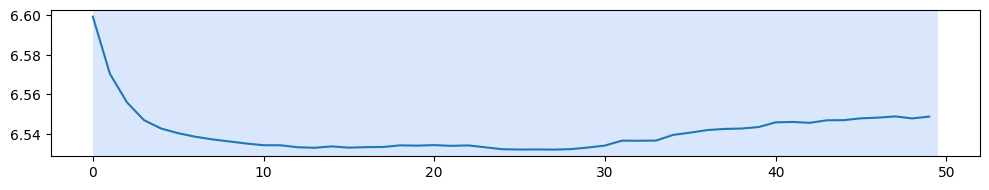

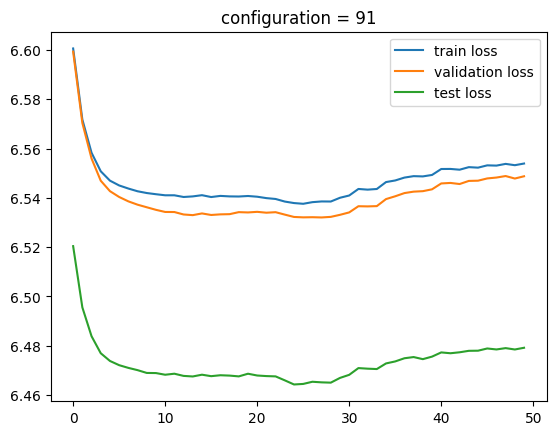

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


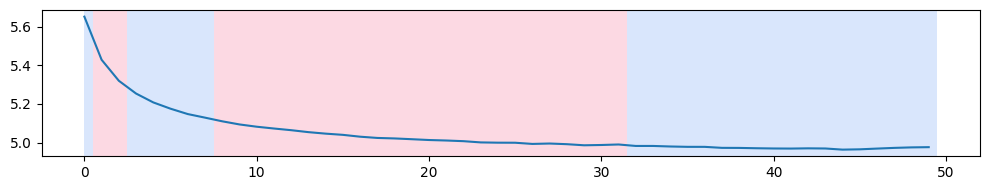

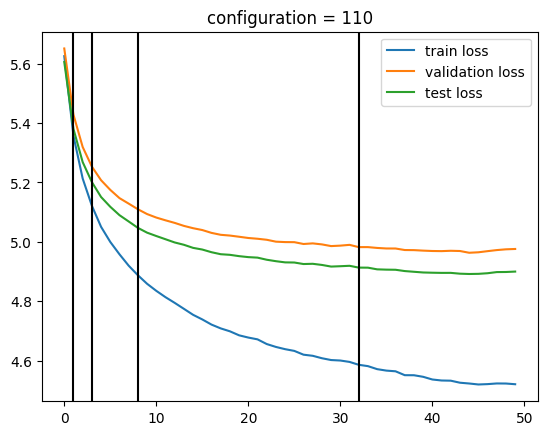

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


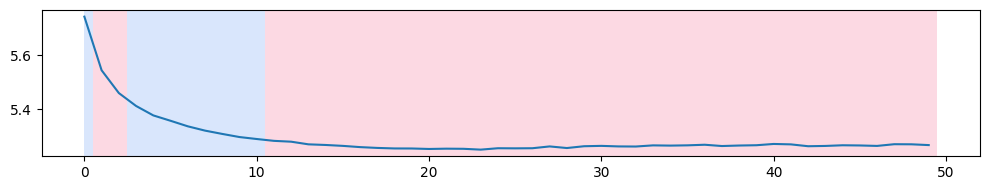

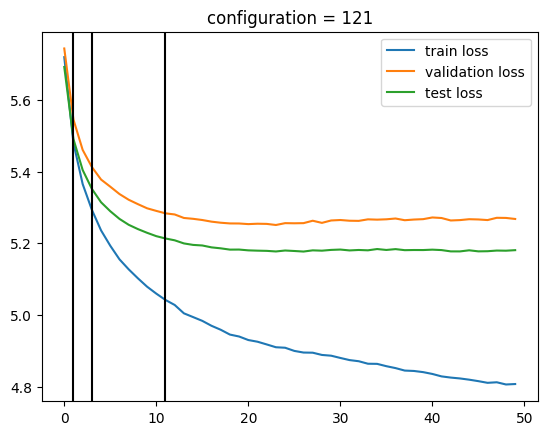

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


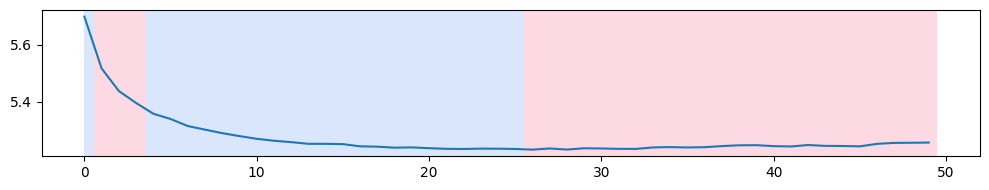

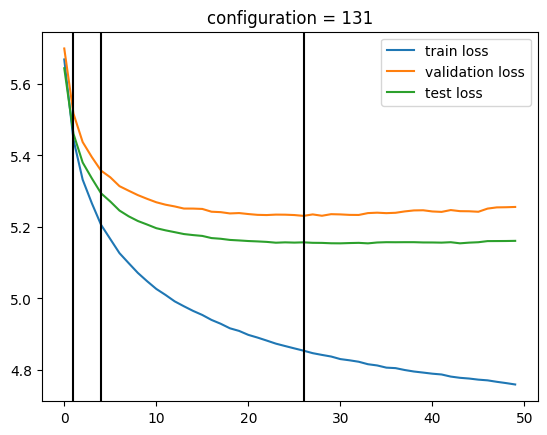

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


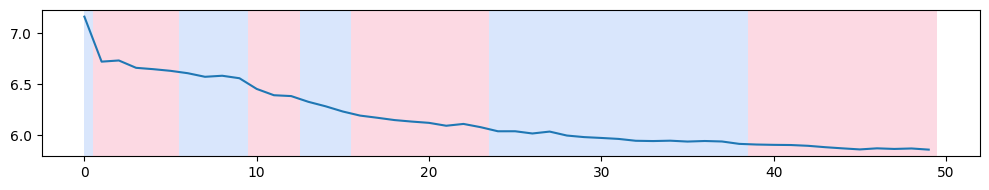

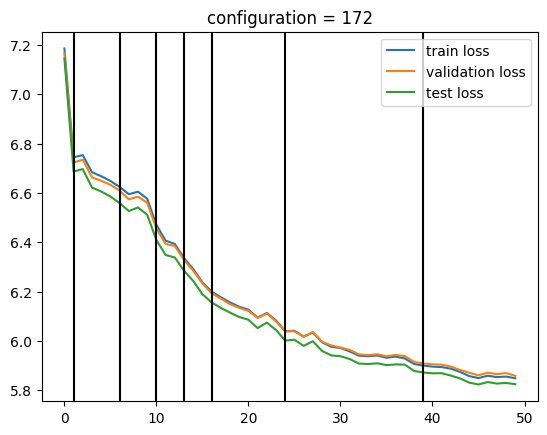

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0.]


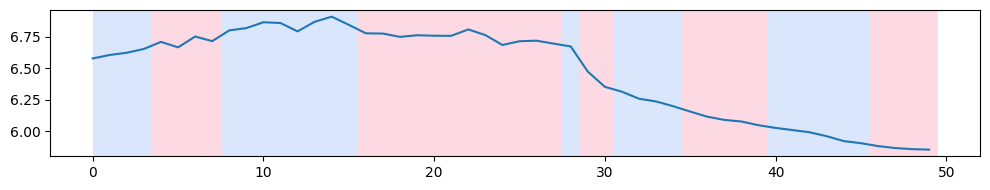

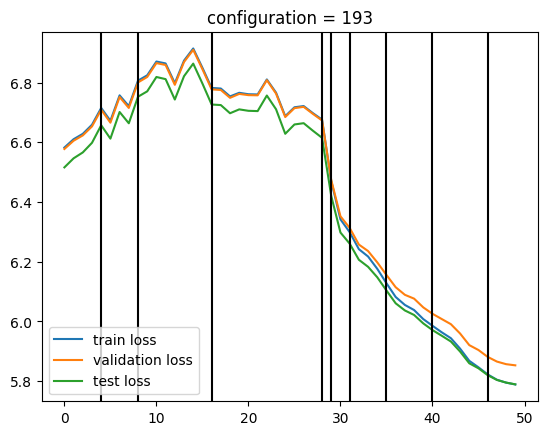

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


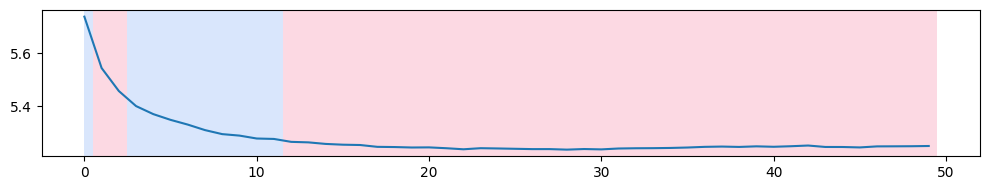

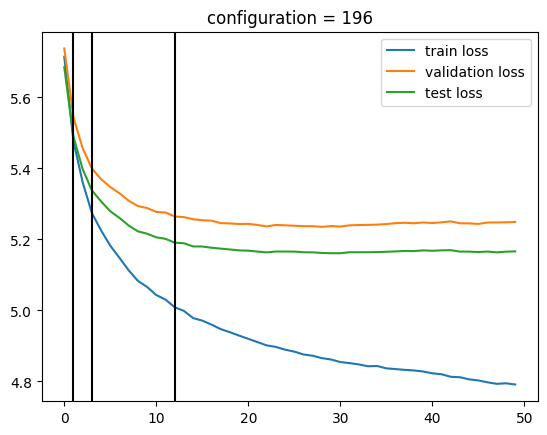

[0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0.]


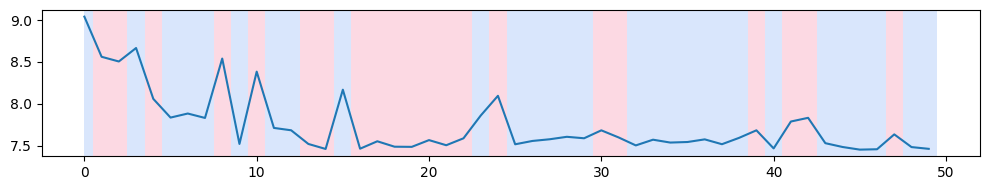

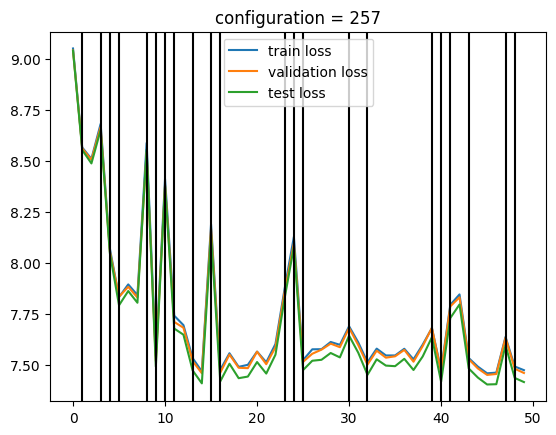

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


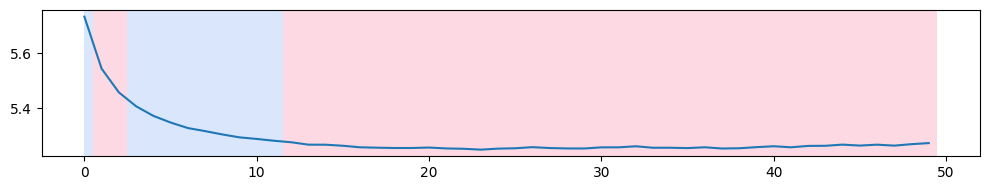

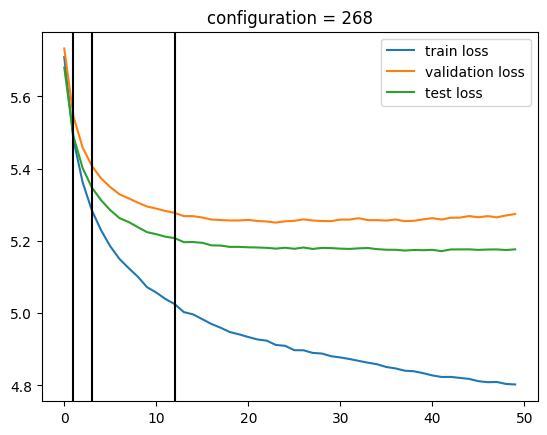

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


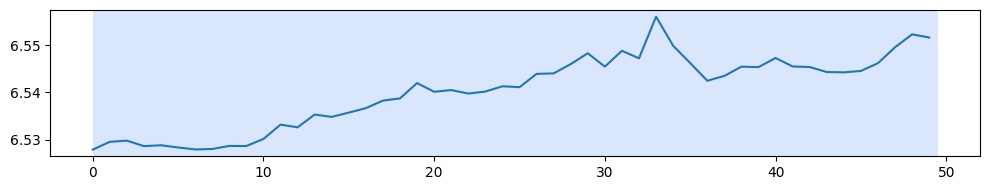

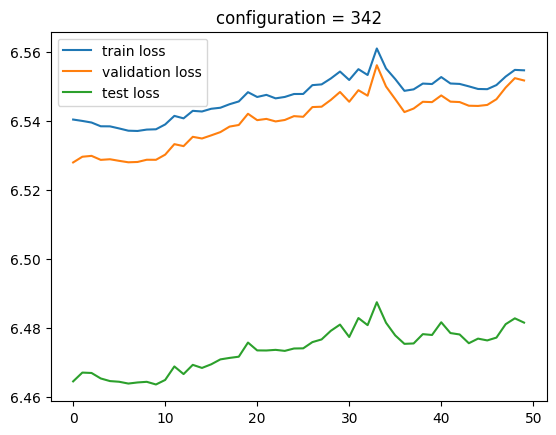

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


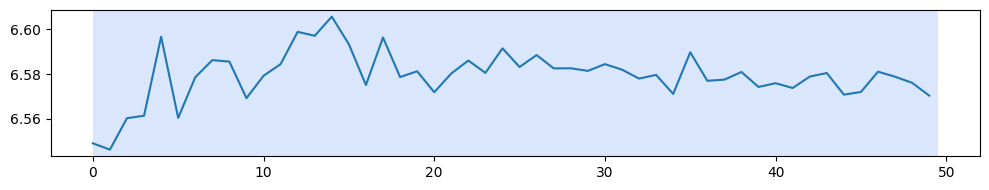

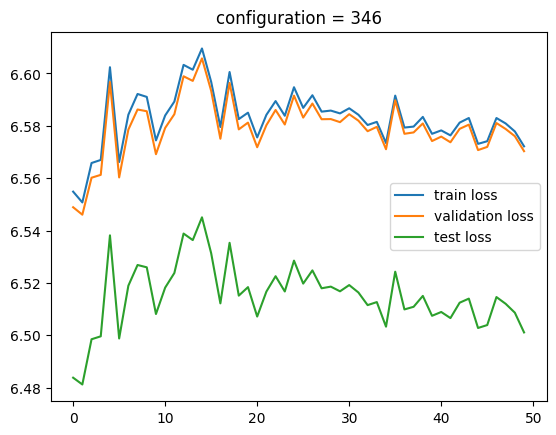

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


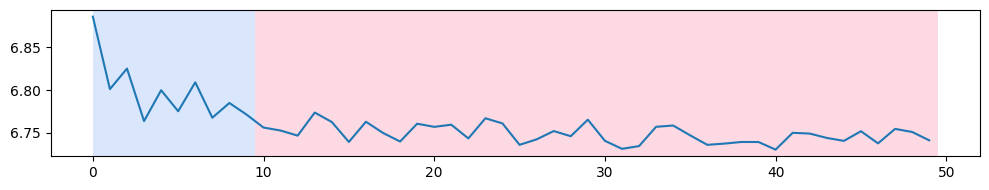

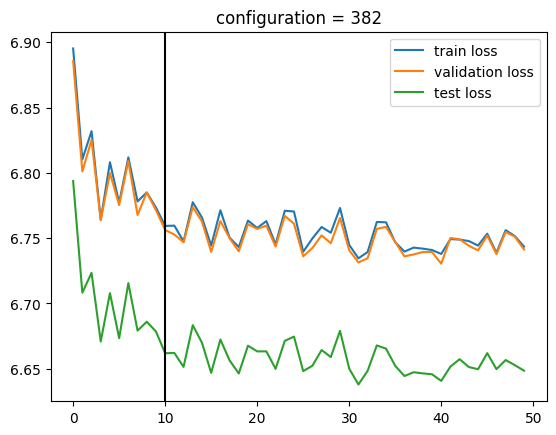

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


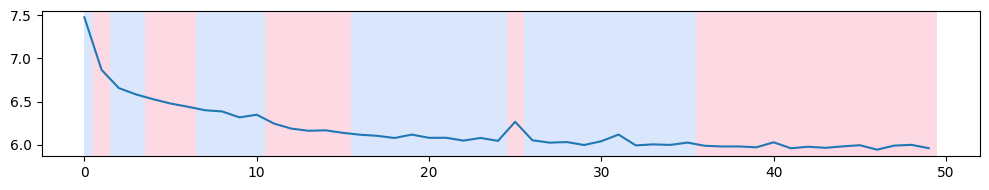

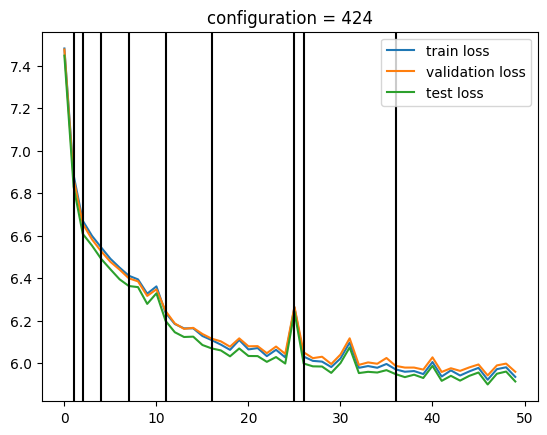

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


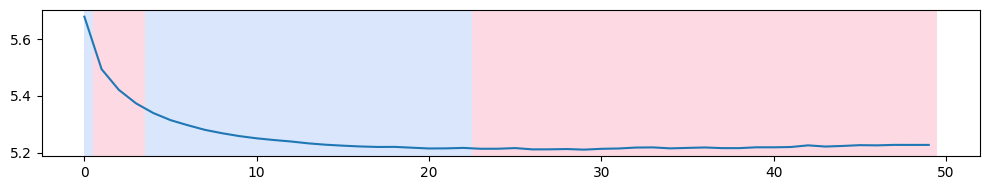

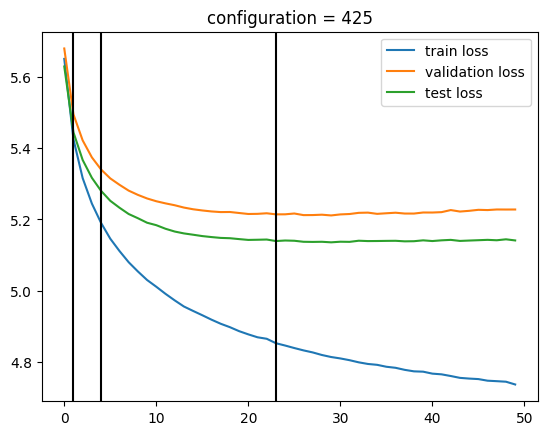

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


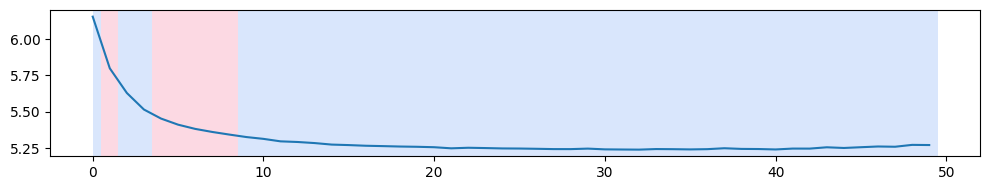

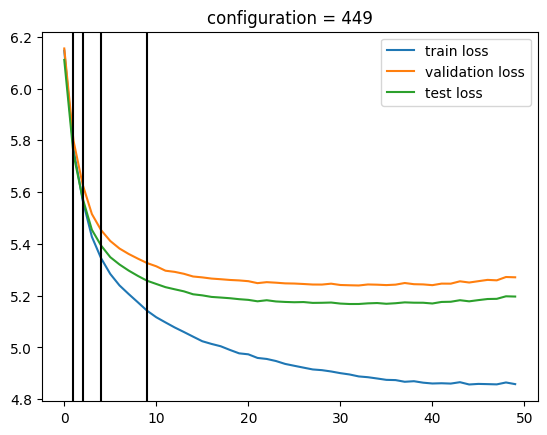

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


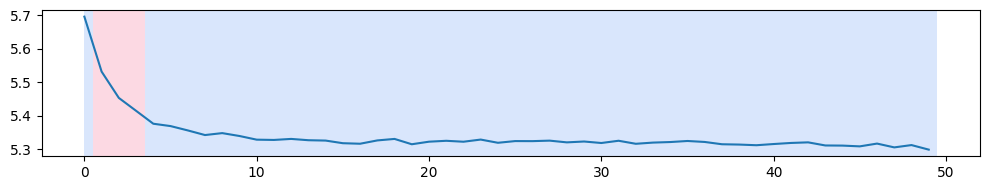

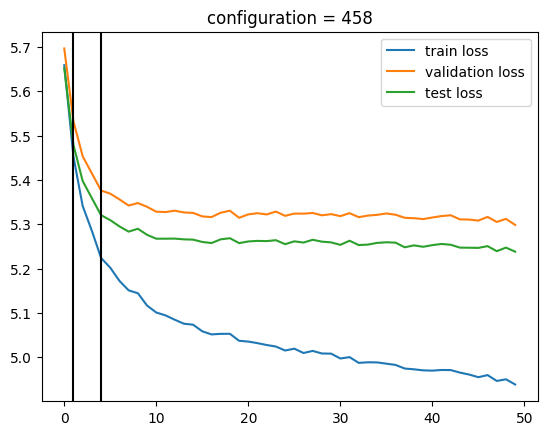

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


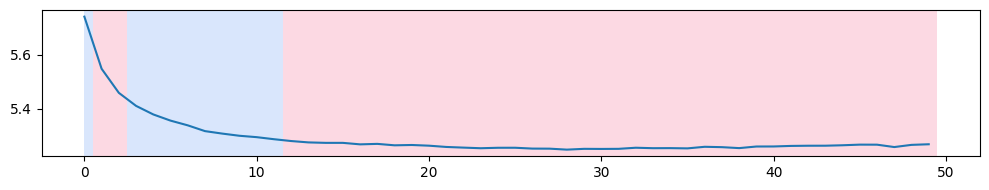

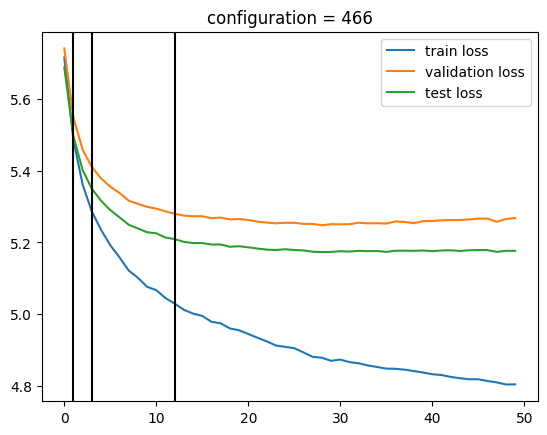

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


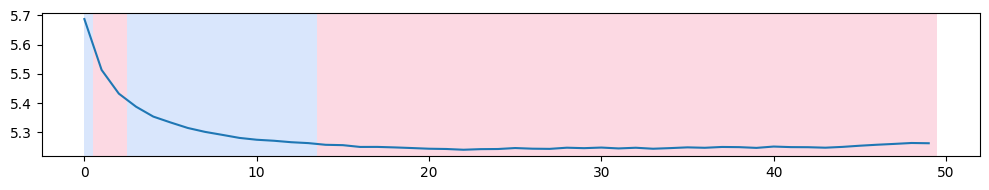

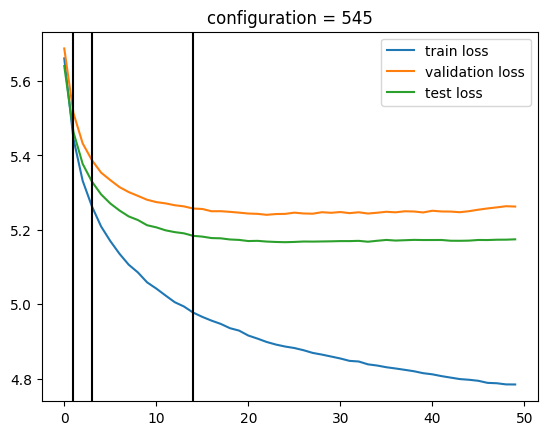

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0.]


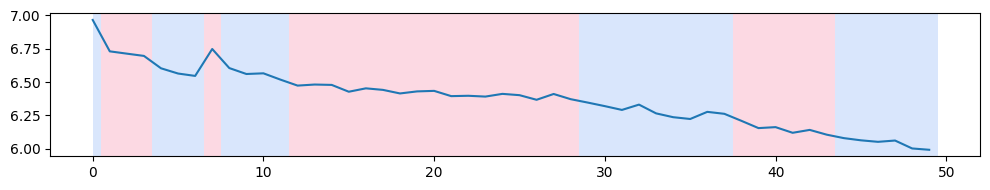

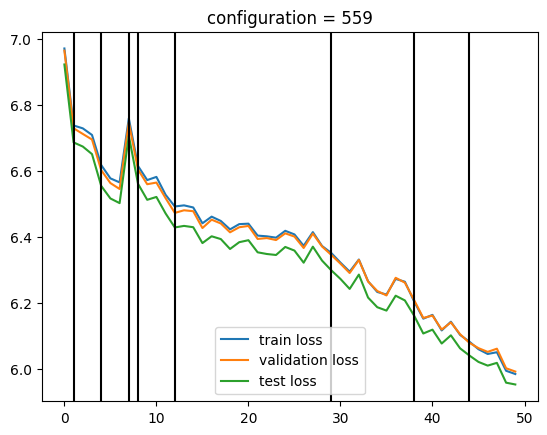

In [8]:
interesting_configurations_indexes = [91, 110, 121, 131, 172, 193, 196, 257, 268, 342, 
                                      346, 382, 424, 425, 449, 458, 466, 545, 559]

cusum_threshold = 0.125
logs = dict()
for t in interesting_configurations_indexes:
    env.reset()
    
    train_losses = []
    val_losses = []
    test_losses = []
    logs[t] = dict()
    for i in range(50):
        env.simulated_train(search_set[t], i)
        if env.get_model_status(search_set[t]) == 'OK':
            train_loss = env.get_model_stats(search_set[t], i)['train_loss']
            val_loss   = env.get_model_stats(search_set[t], i)['val_loss']
            test_loss  = env.get_model_stats(search_set[t], i)['test_loss']
            
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            test_losses.append(test_loss)
    
    logs[t]["train_losses"] = train_losses   
    logs[t]["val_losses"] = val_losses 
    logs[t]["test_losses"] = test_losses 
    
    res, all_change_idxs, _, _ = cusum_detector(series = val_losses, threshold = cusum_threshold)
    print(res)
    rpt.display(np.array(val_losses), all_change_idxs)
    plt.show()
    
    plt.plot(train_losses, label = "train loss")
    plt.plot(val_losses,   label = "validation loss")
    plt.plot(test_losses,  label = "test loss")
    for change_idx in all_change_idxs[:-1]:
        plt.axvline(change_idx, color = "black")
    plt.title(f"configuration = {t}")
    plt.legend()
    plt.show()
    
#     #plt.plot(val_losses)
#     plt.plot(normal_to_change_stat)
#     plt.plot(change_to_normal_stat)
#     plt.axhline(cusum_threshold, color = "red")
#     plt.show()

Conclusion: for different models we need different threashold.

### "Adaptive" cusum_threshold

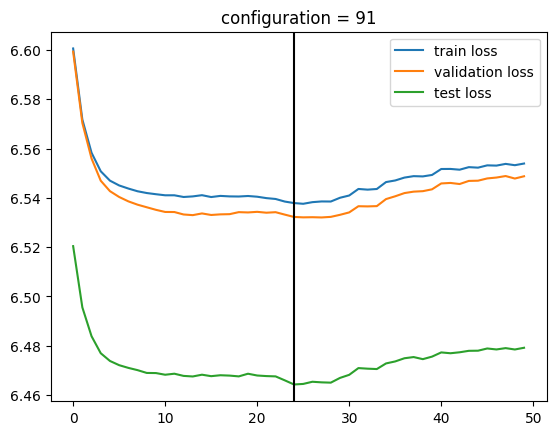

0.06700000000000017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


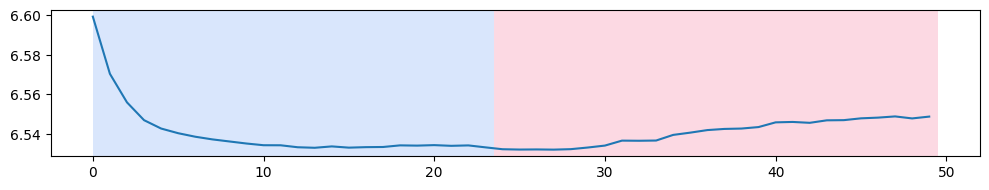

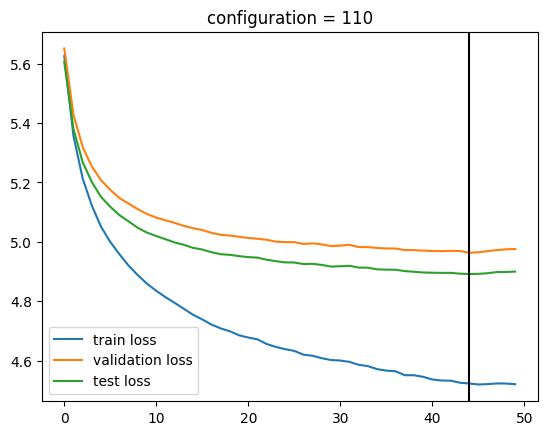

0.6880000000000006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


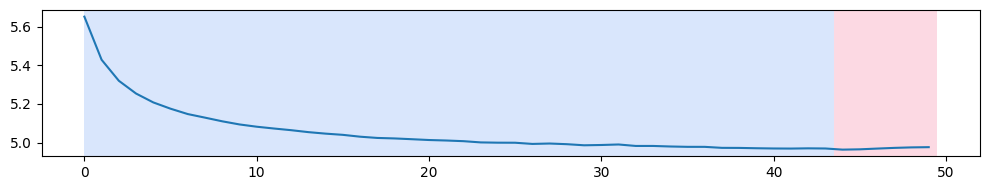

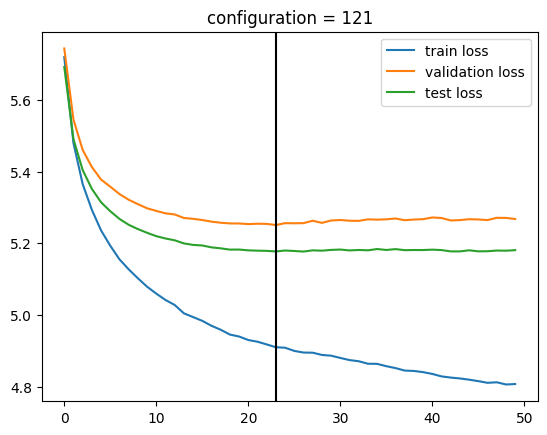

0.4919999999999991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


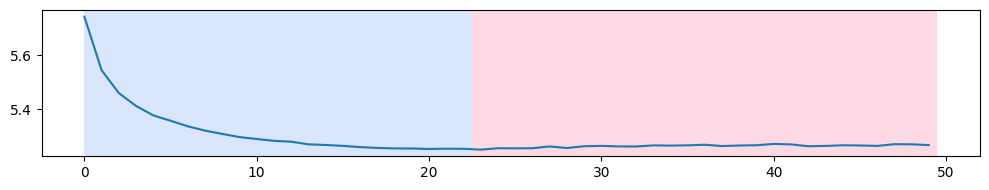

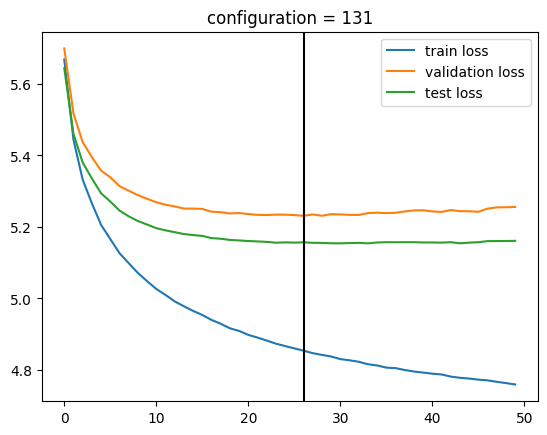

0.46799999999999997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


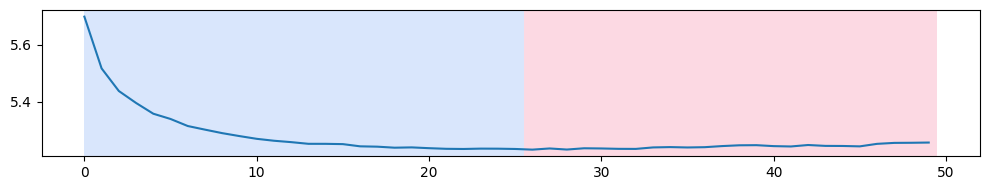

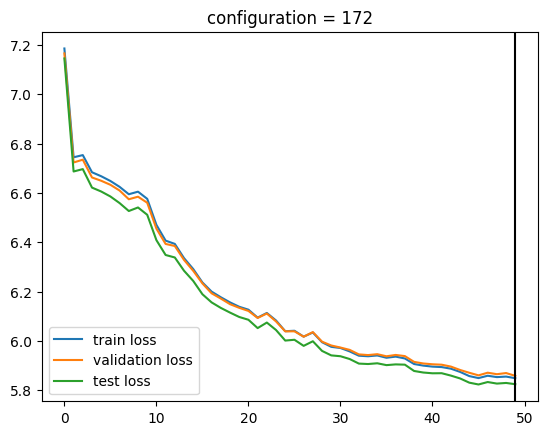

1.3059999999999992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


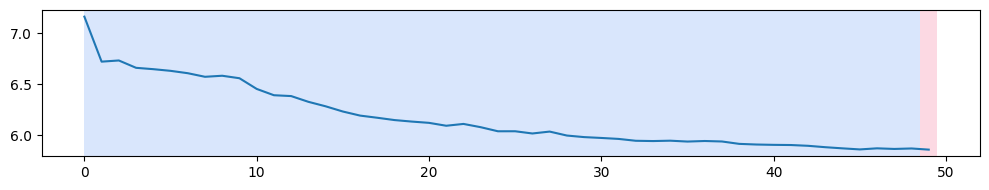

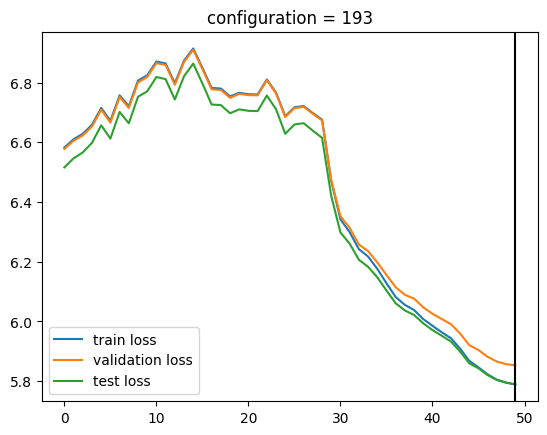

1.0559999999999992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


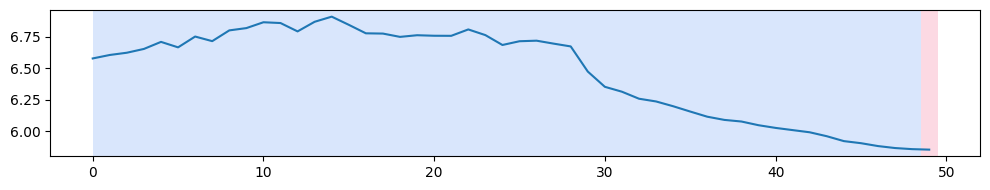

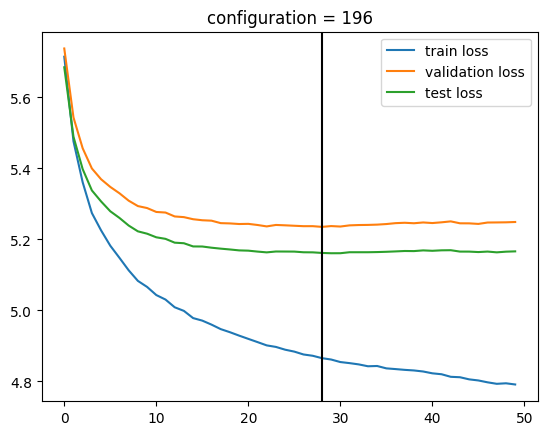

0.5020000000000007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


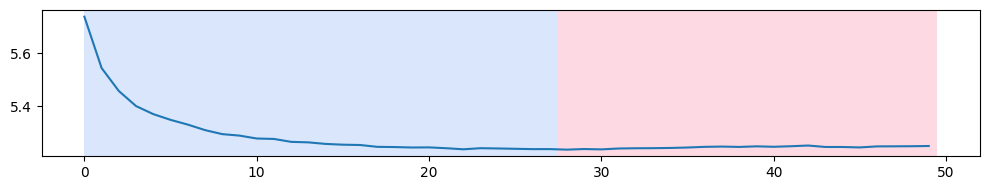

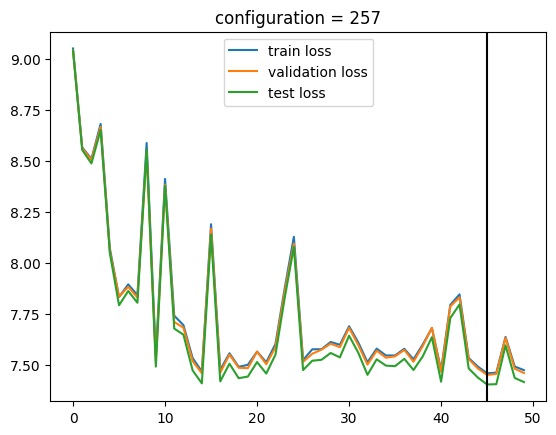

1.5879999999999992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


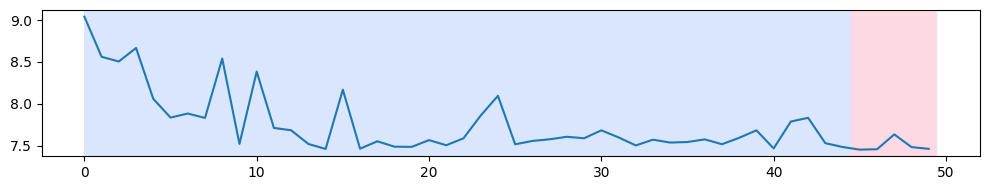

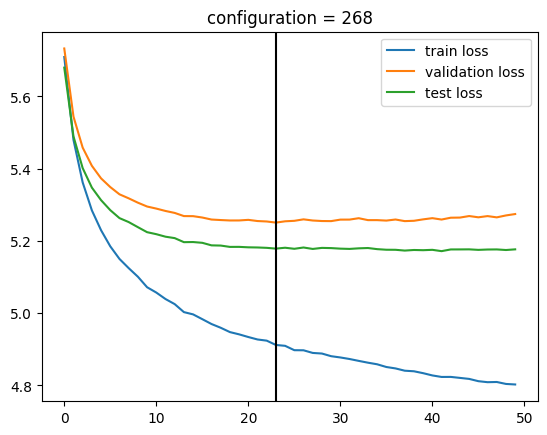

0.48099999999999987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


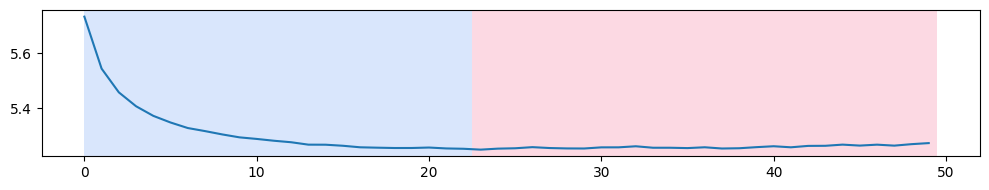

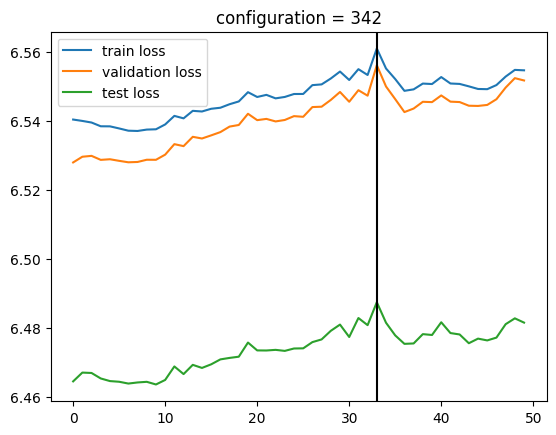

0.02800000000000047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


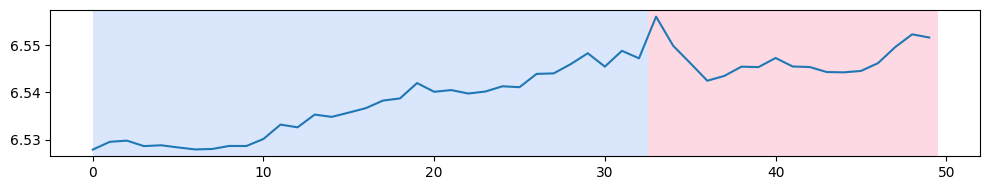

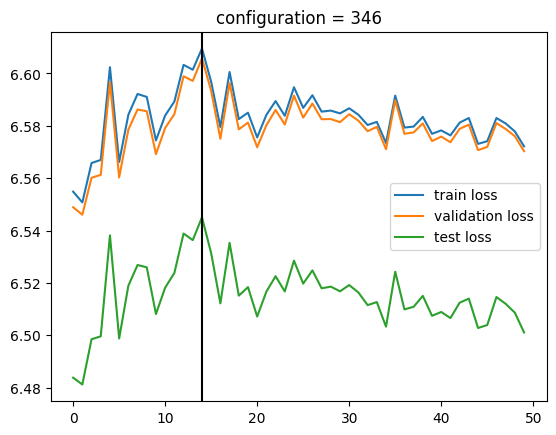

0.058999999999999275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


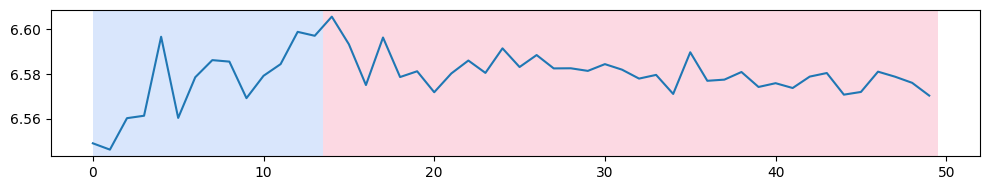

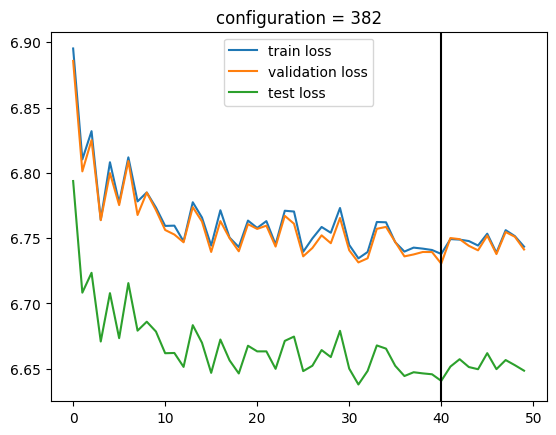

0.15499999999999936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


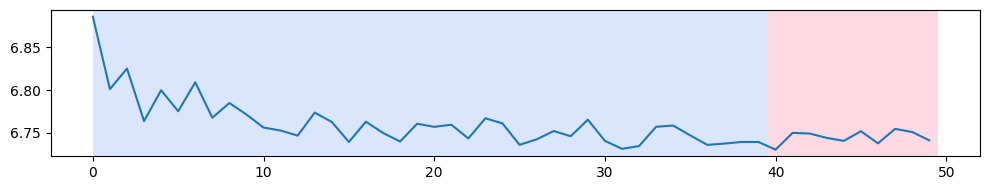

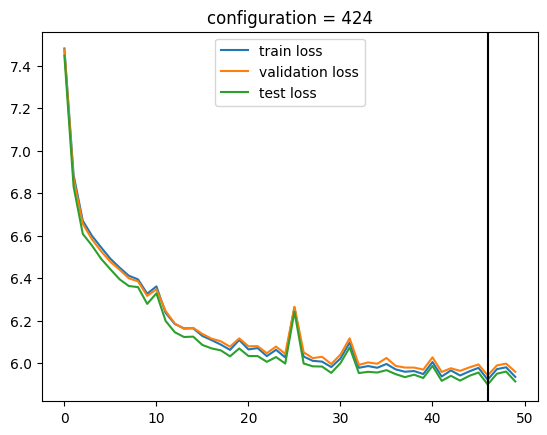

1.5329999999999995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


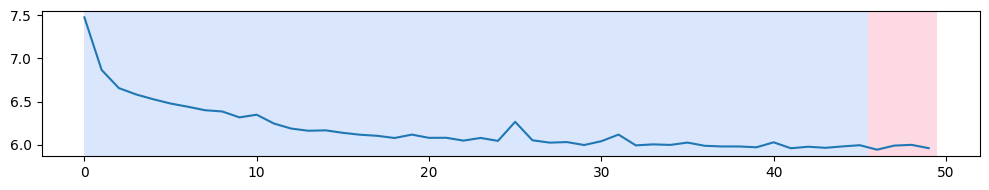

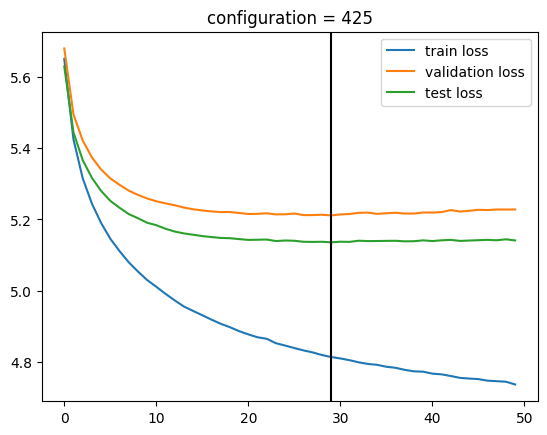

0.4670000000000005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


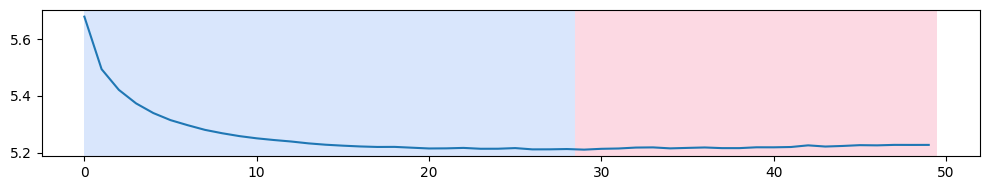

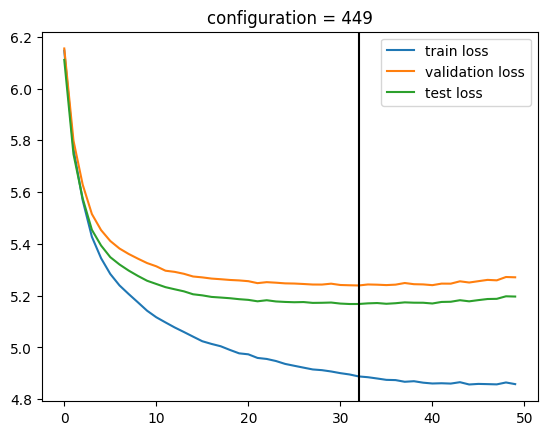

0.9149999999999991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


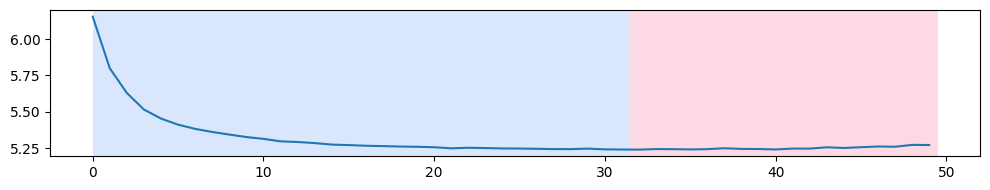

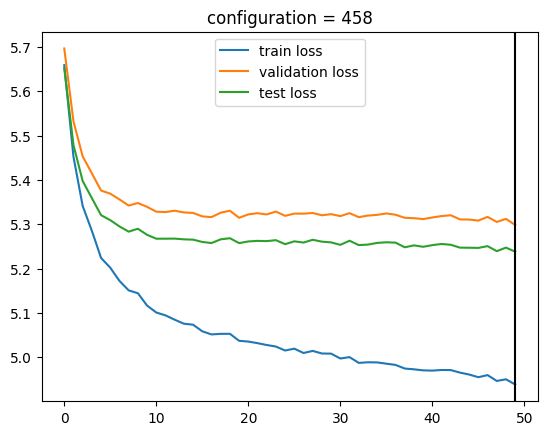

0.39700000000000024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


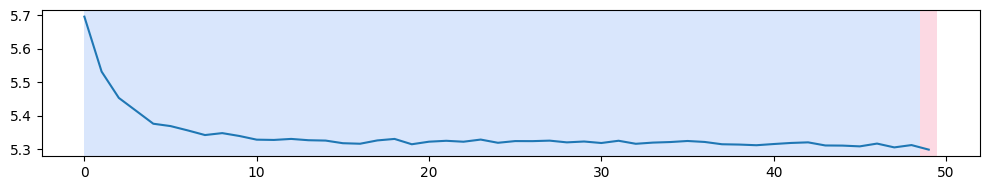

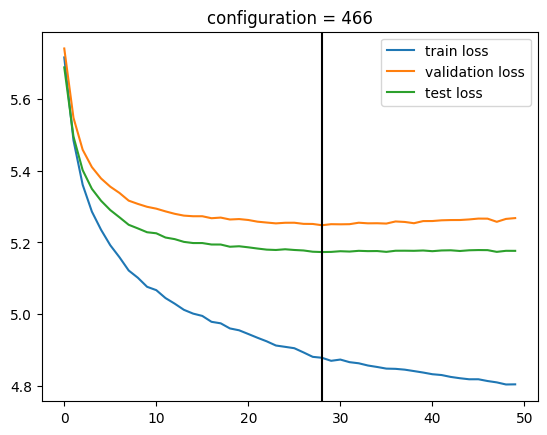

0.4930000000000003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


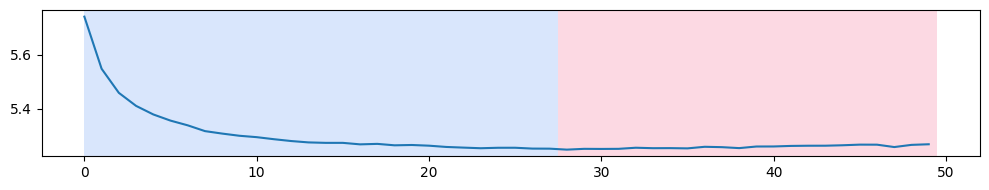

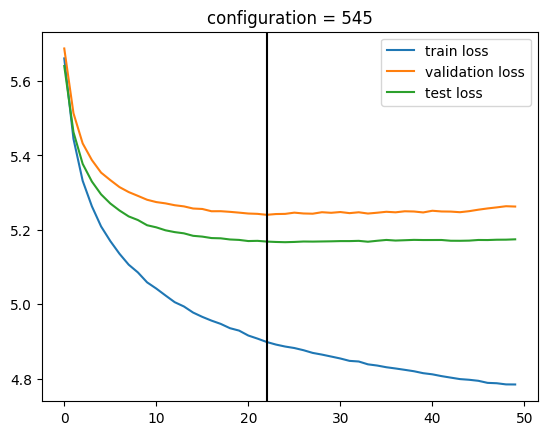

0.4469999999999992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


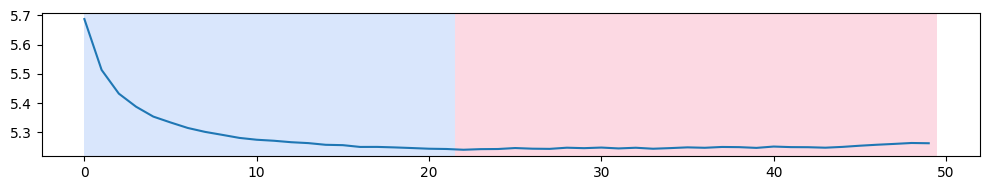

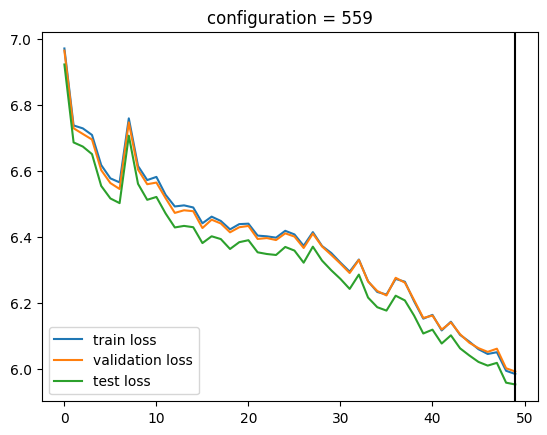

0.972999999999999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


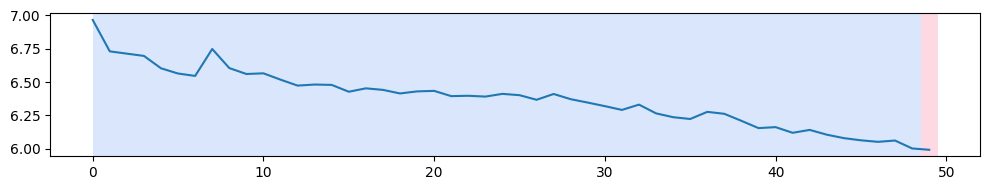

In [69]:
interesting_configurations_indexes = [91, 110, 121, 131, 172, 193, 196, 257, 268, 342, 
                                      346, 382, 424, 425, 449, 458, 466, 545, 559]


logs = dict()
for t in interesting_configurations_indexes:
    env.reset()
    
    train_losses = []
    val_losses = []
    test_losses = []
    logs[t] = dict()
    for i in range(50):
        env.simulated_train(search_set[t], i)
        if env.get_model_status(search_set[t]) == 'OK':
            train_loss = env.get_model_stats(search_set[t], i)['train_loss']
            val_loss   = env.get_model_stats(search_set[t], i)['val_loss']
            test_loss  = env.get_model_stats(search_set[t], i)['test_loss']
            
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            test_losses.append(test_loss)
    
    logs[t]["train_losses"] = train_losses   
    logs[t]["val_losses"] = val_losses 
    logs[t]["test_losses"] = test_losses 
    
    all_change_idxs = [len(val_losses)]
    cusum_threshold = 0
    for cusum_threshold in [10 - 0.001 * i for i in range(10001)]:
        res, all_change_idxs, _, _ = cusum_detector(series = val_losses, threshold = cusum_threshold)
        if len(all_change_idxs) == 2:
            break
        
    plt.plot(train_losses, label = "train loss")
    plt.plot(val_losses,   label = "validation loss")
    plt.plot(test_losses,  label = "test loss")
    for change_idx in all_change_idxs[:-1]:
        plt.axvline(change_idx, color = "black")
    plt.title(f"configuration = {t}")
    plt.legend()
    plt.show()
    
    print(cusum_threshold)
    print(res)
    rpt.display(np.array(val_losses), all_change_idxs)
    plt.show()
    
#     #plt.plot(val_losses)
#     plt.plot(normal_to_change_stat)
#     plt.plot(change_to_normal_stat)
#     plt.axhline(cusum_threshold, color = "red")
#     plt.show()

It looks kinda adequate early stopping points.

In [50]:
# logs = dict()
# for t in tqdm(range(len(search_set))):
#     env.reset()
    
#     train_losses = []
#     val_losses = []
#     test_losses = []
#     logs[t] = dict()
#     for i in range(50):
#         env.simulated_train(search_set[t], i)
#         if env.get_model_status(search_set[t]) == 'OK':
#             train_loss = env.get_model_stats(search_set[t], i)['train_loss']
#             val_loss   = env.get_model_stats(search_set[t], i)['val_loss']
#             test_loss  = env.get_model_stats(search_set[t], i)['test_loss']
            
#             train_losses.append(train_loss)
#             val_losses.append(val_loss)
#             test_losses.append(test_loss)
    
#     logs[t]["train_losses"] = train_losses   
#     logs[t]["val_losses"] = val_losses 
#     logs[t]["test_losses"] = test_losses 
    
#     all_change_idxs = [len(val_losses)]
#     cusum_threshold = 0
#     for cusum_threshold in [10 - 0.001 * i for i in range(10001)]:
#         res, all_change_idxs, _, _ = cusum_detector(series = val_losses, threshold = cusum_threshold)
#         if len(all_change_idxs) == 2:
#             break
    
#     logs[t]["cusum_threshold"] = cusum_threshold
#     logs[t]["early_stopping_epoch"] = all_change_idxs[0]


100%|█████████████████████████████████| 14322/14322 [17:36:15<00:00,  4.43s/it]


In [52]:
# with open("logs_adaptive_cusum_threshold.json", "w") as f:
#     json.dump(logs, f)

### normal_to_change_stat and change_to_normal_stat visualisation

In [8]:
with open("logs_adaptive_cusum_threshold.json", "r") as f:
    logs = json.load(f)

In [13]:
len(logs['0']['train_losses'])


50

In [42]:
def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            signals[i] = 1 if y[i] > avgFilter[i-1] else -1
            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

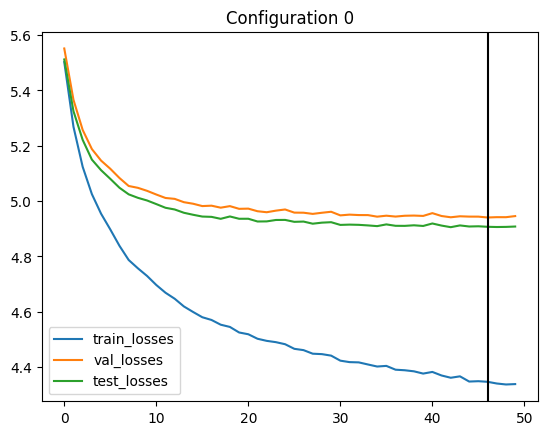

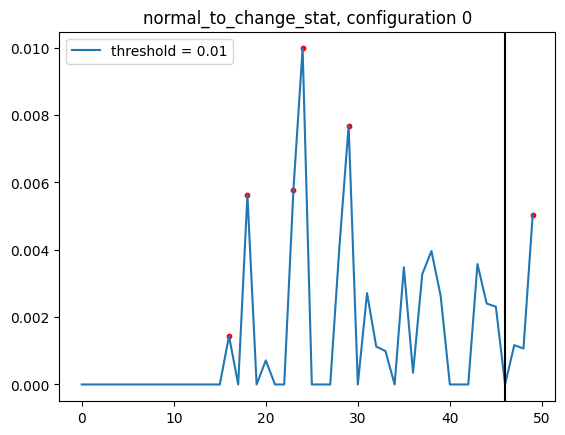

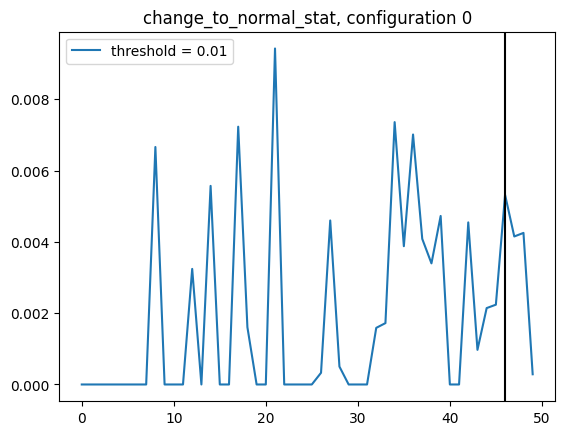

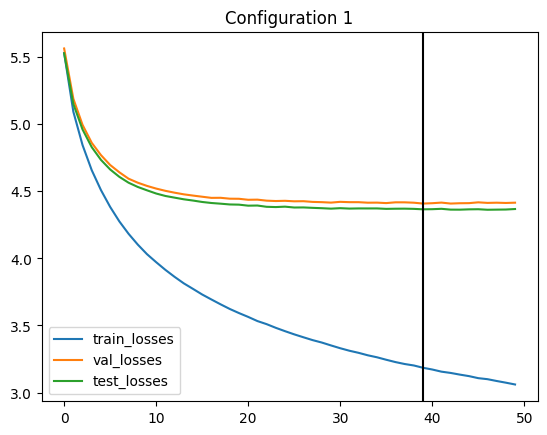

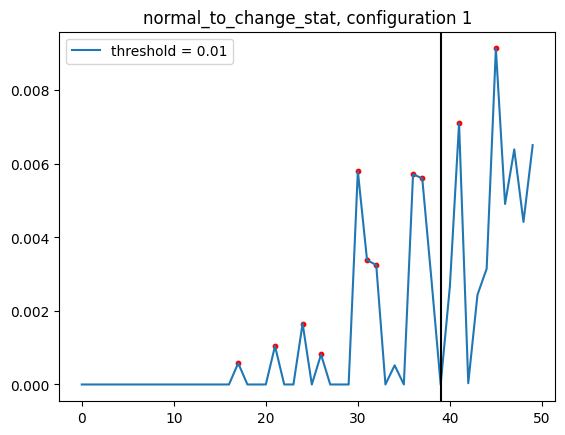

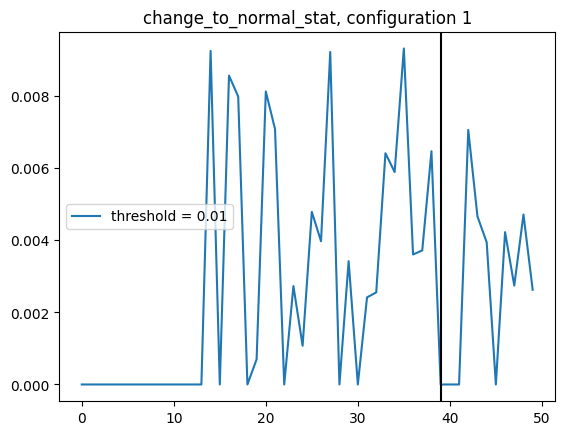

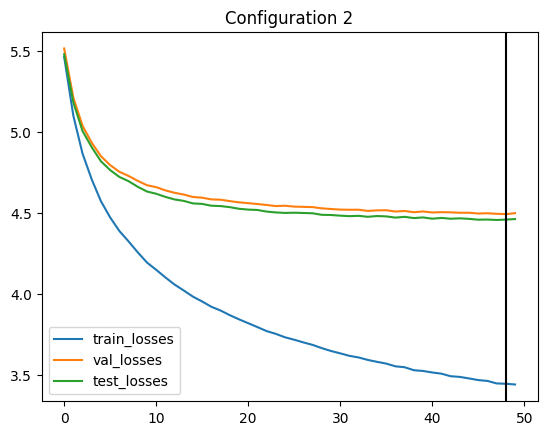

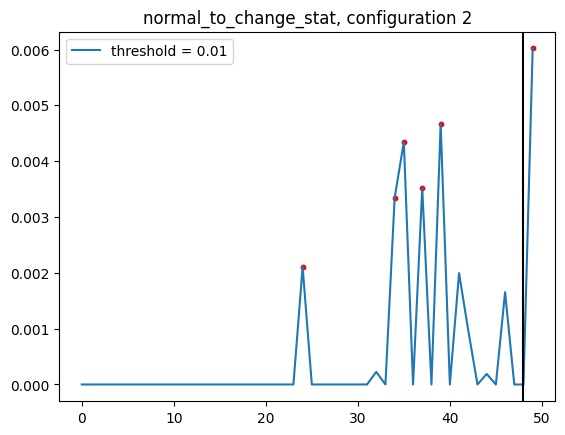

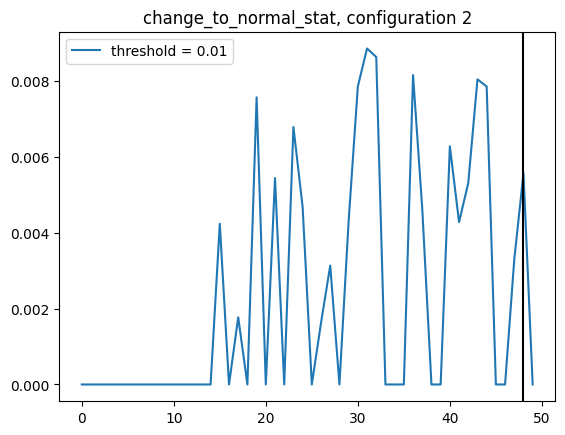

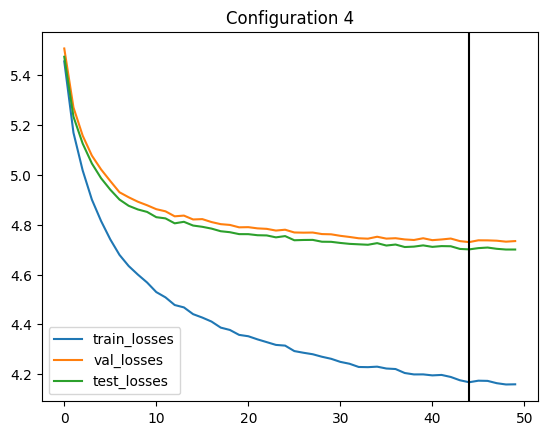

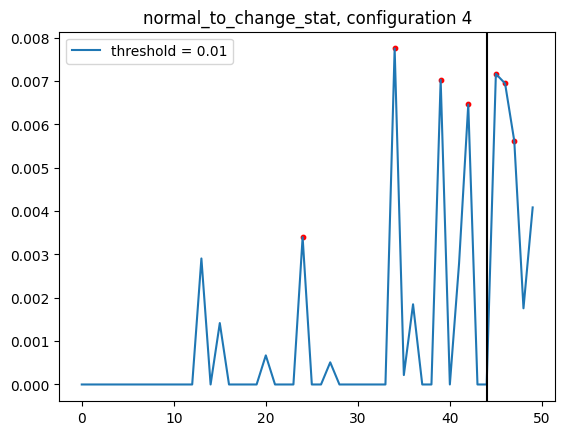

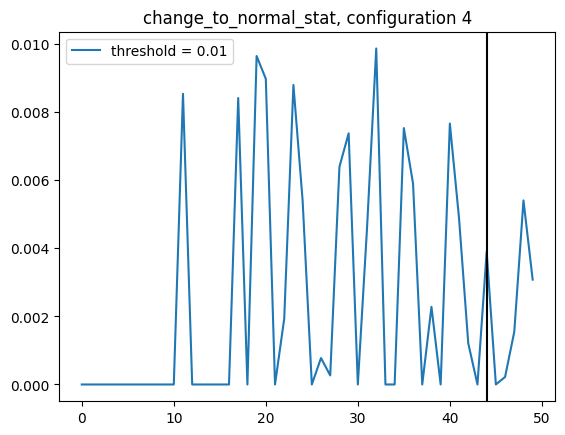

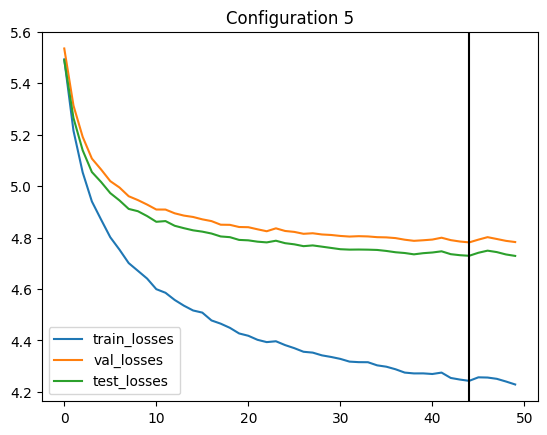

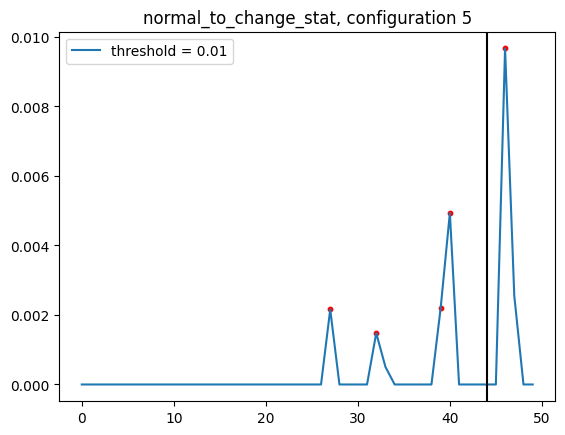

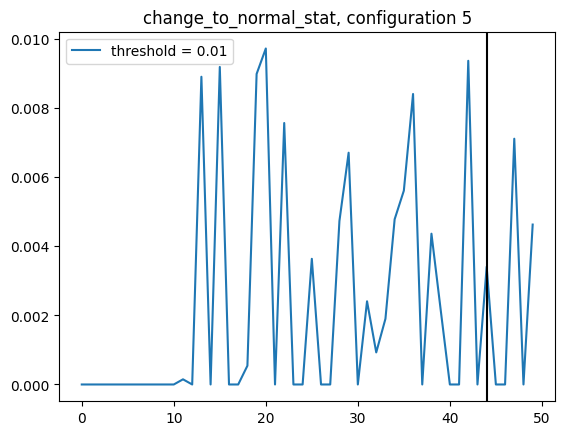

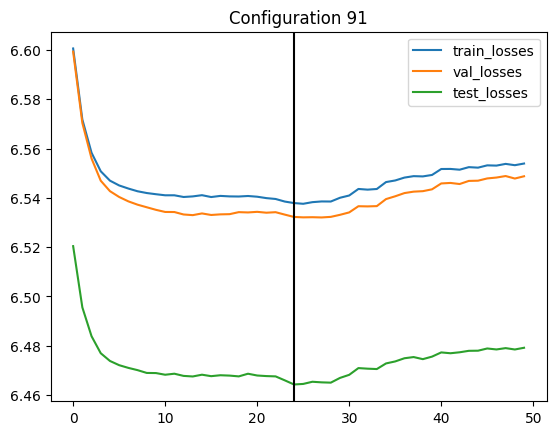

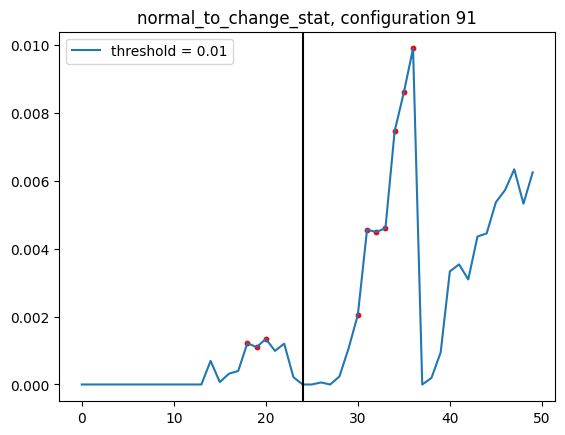

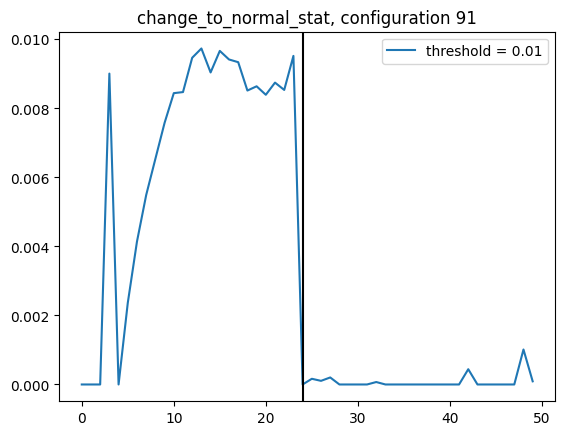

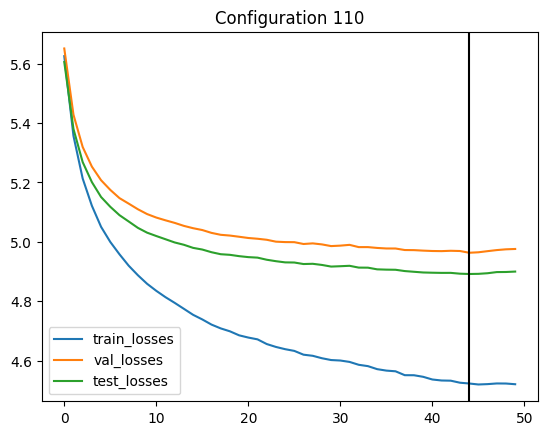

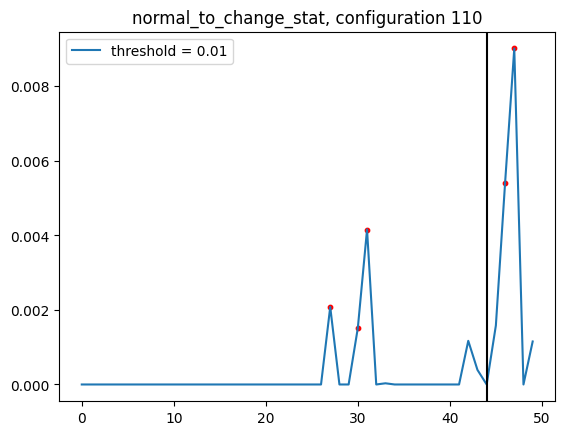

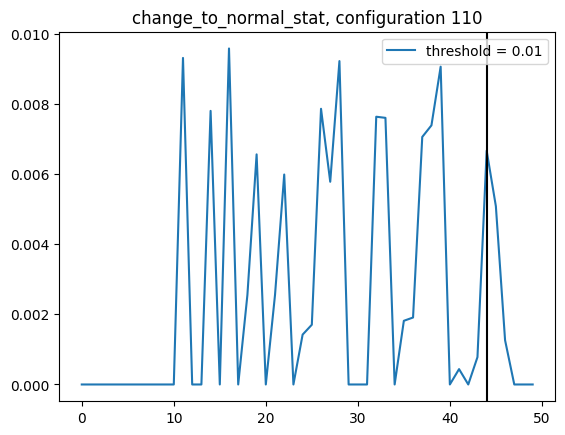

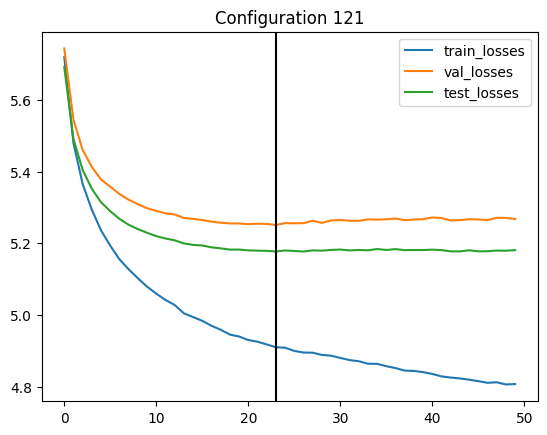

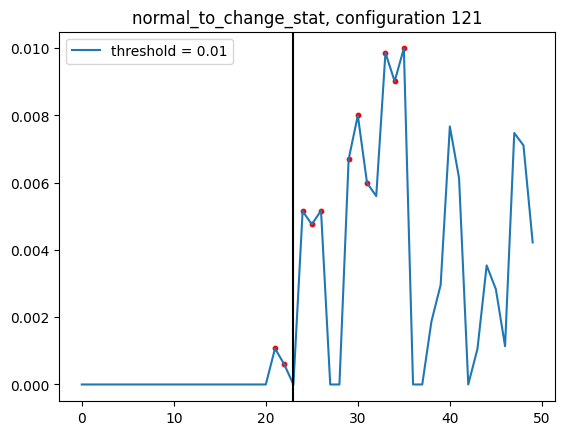

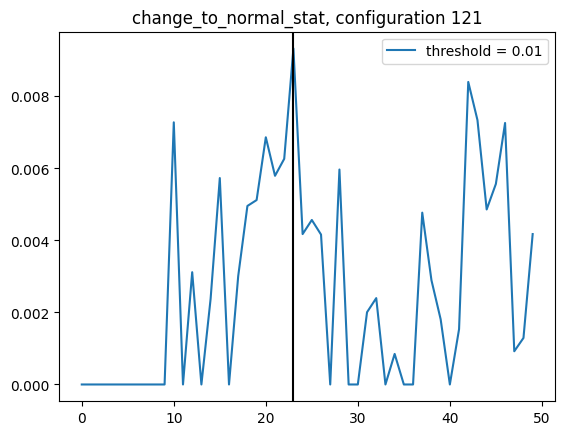

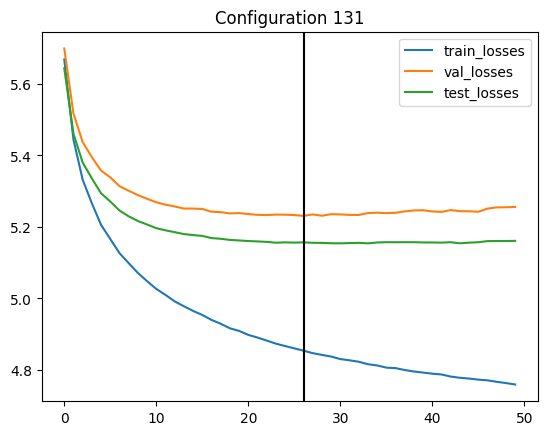

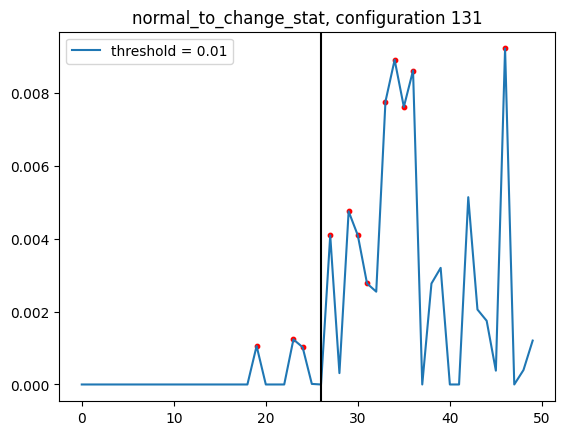

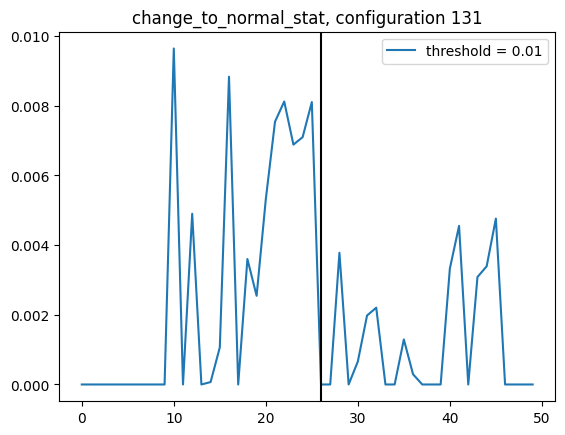

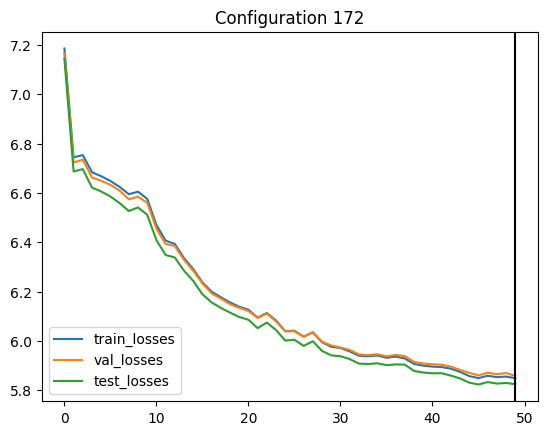

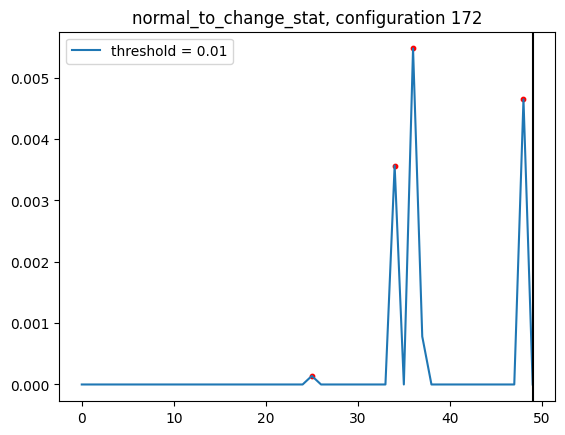

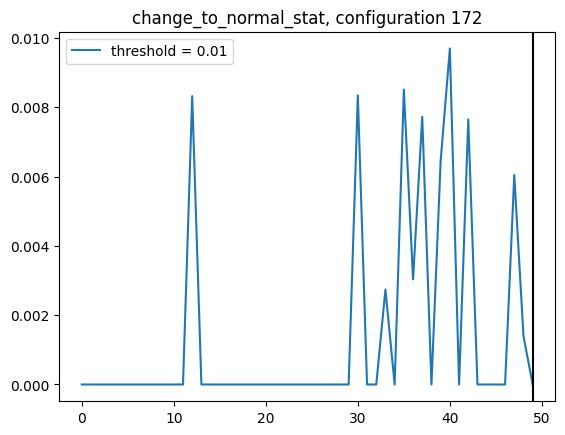

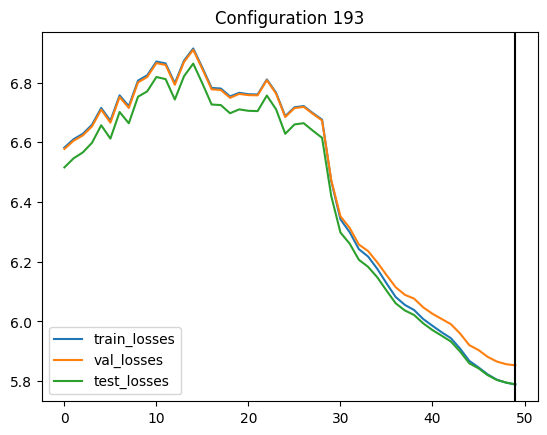

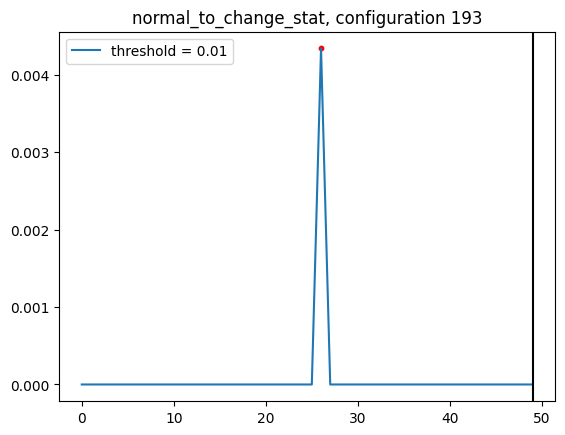

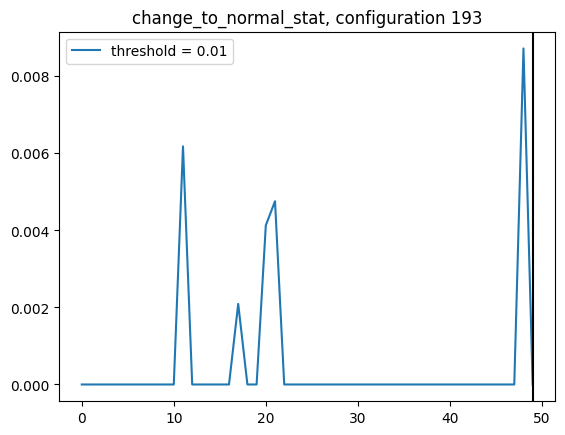

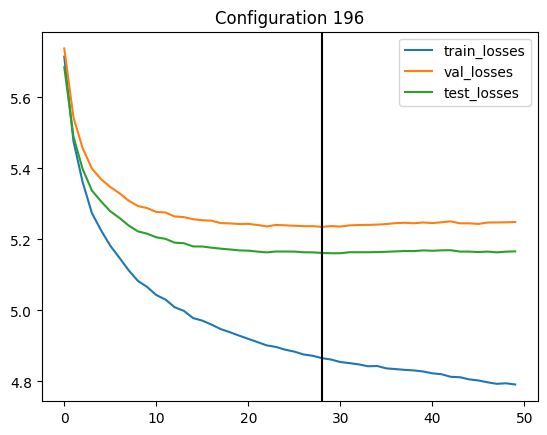

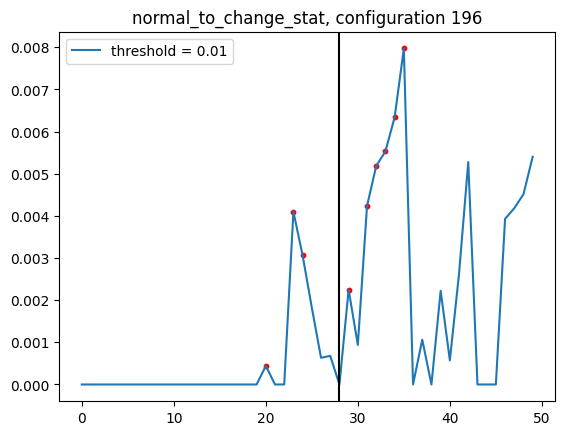

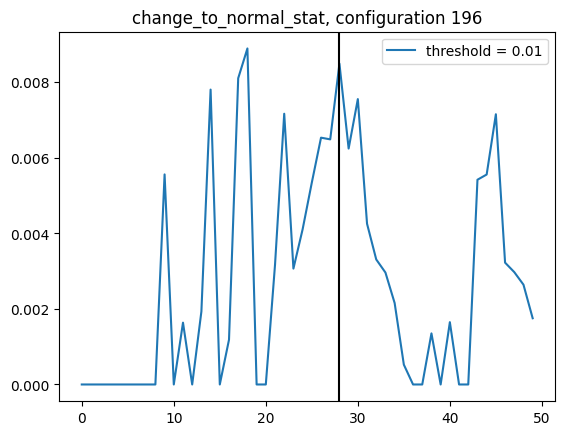

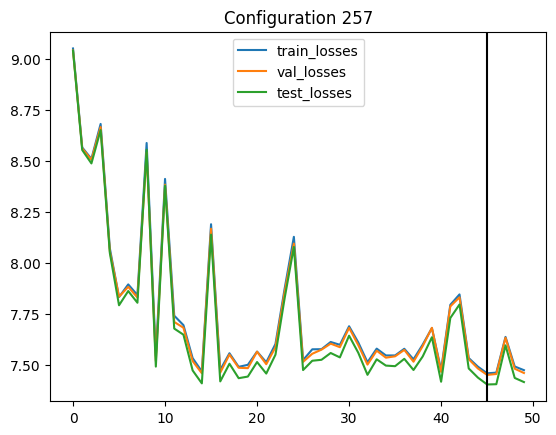

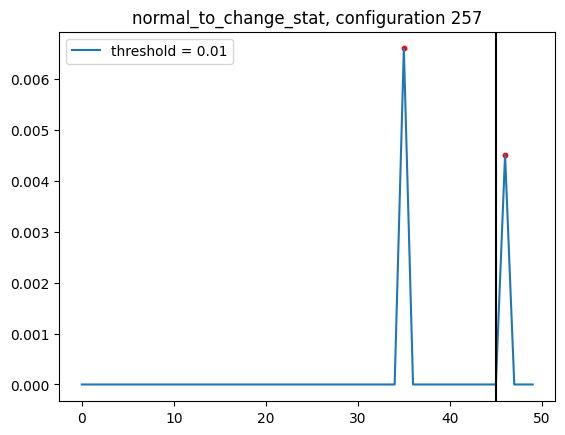

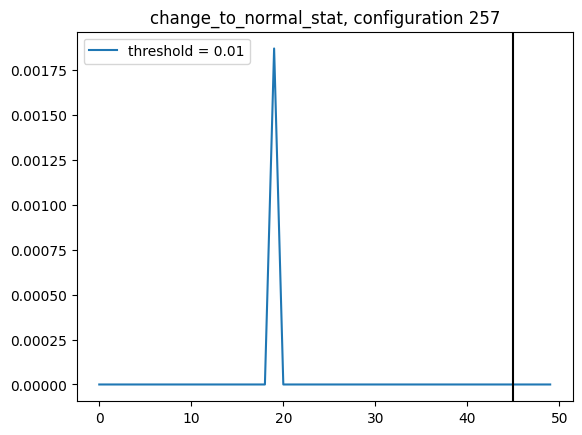

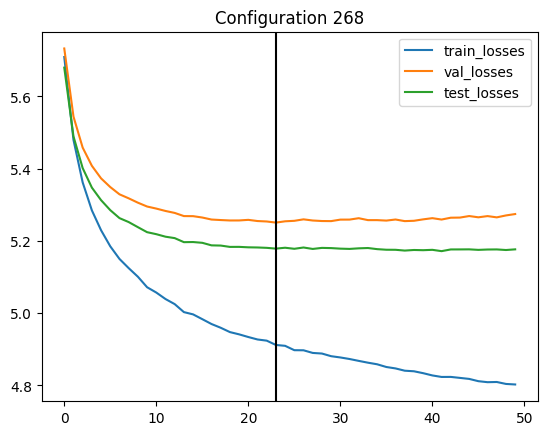

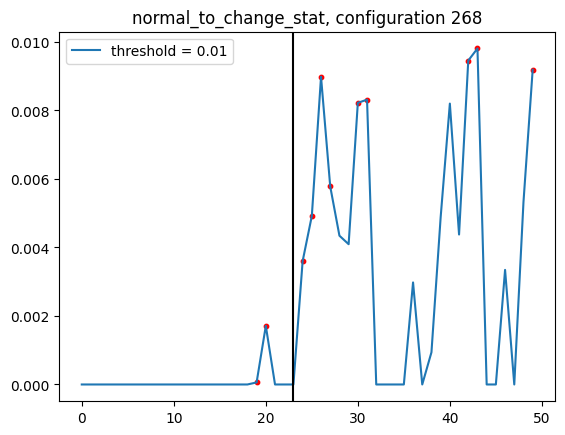

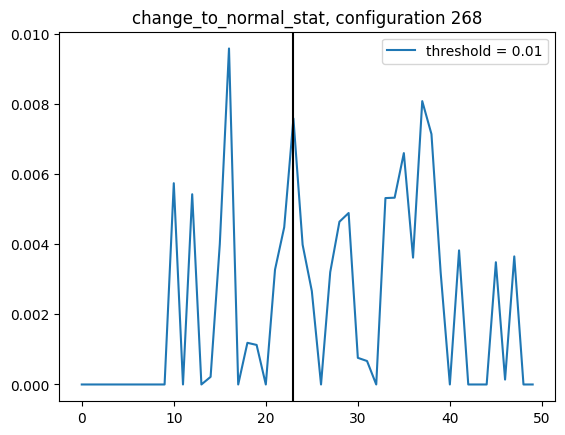

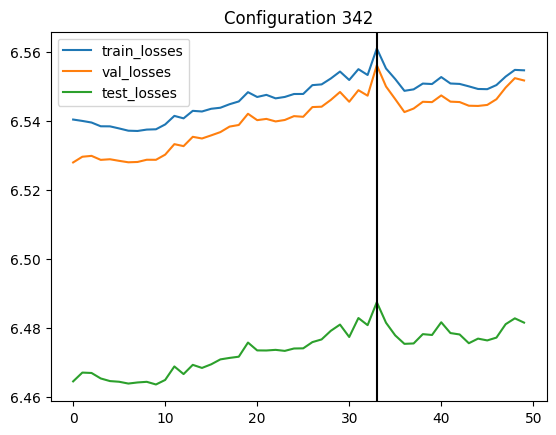

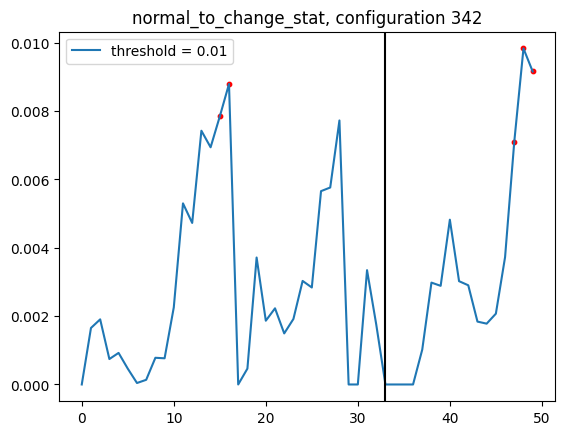

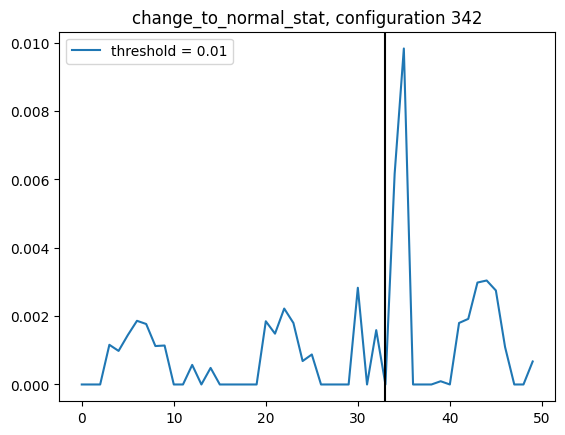

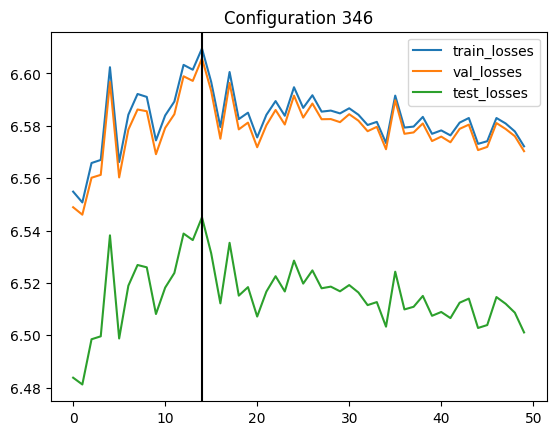

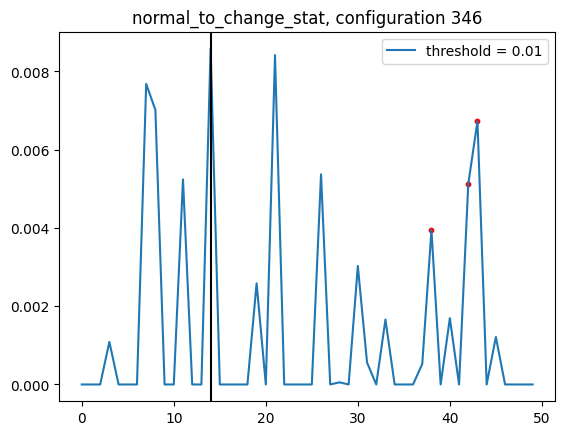

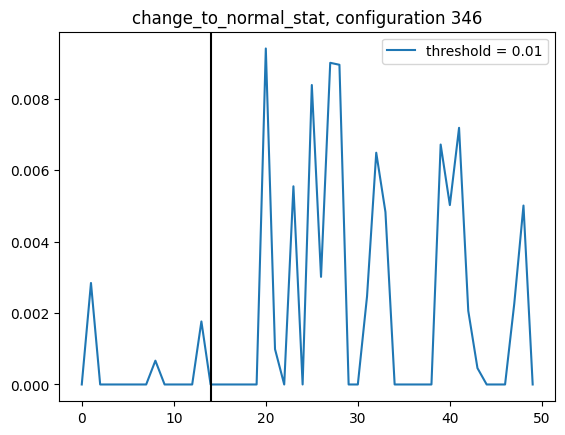

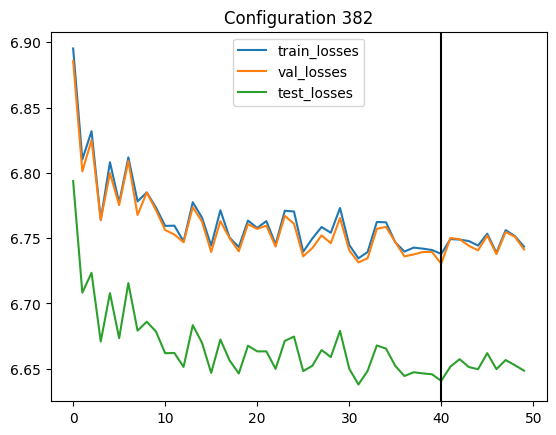

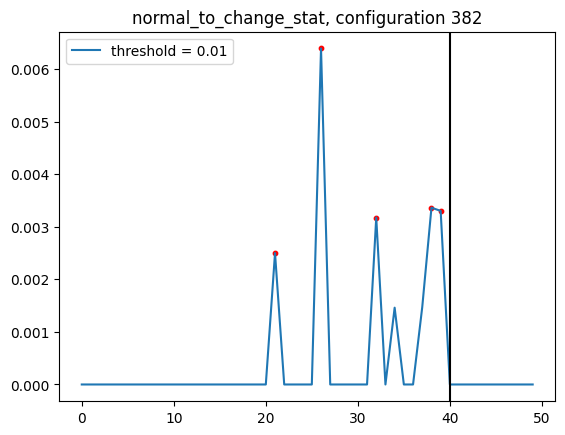

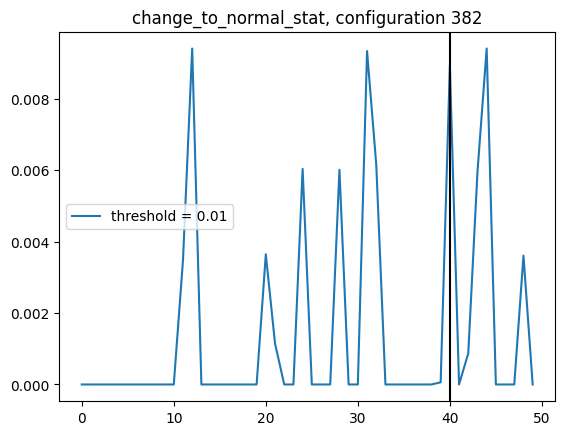

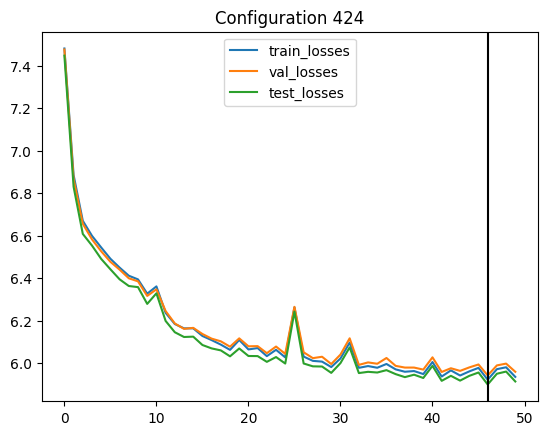

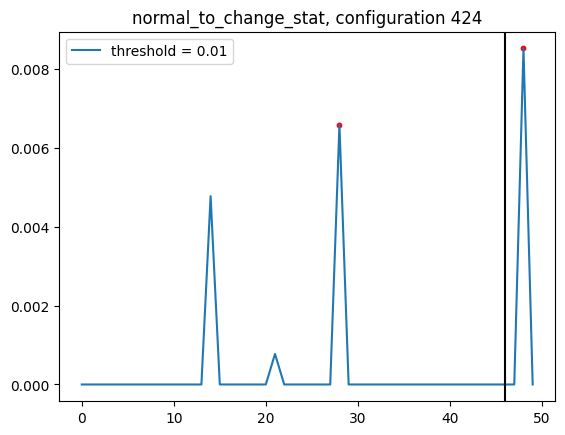

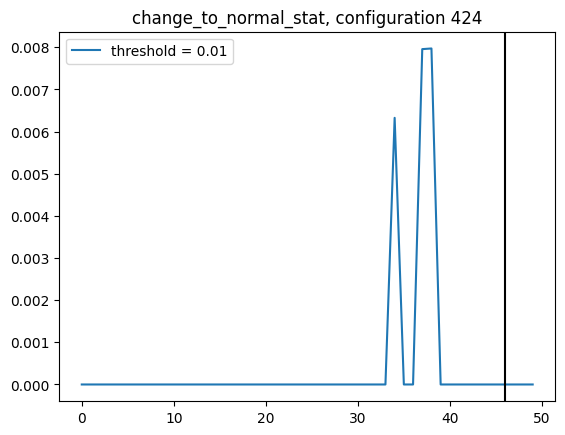

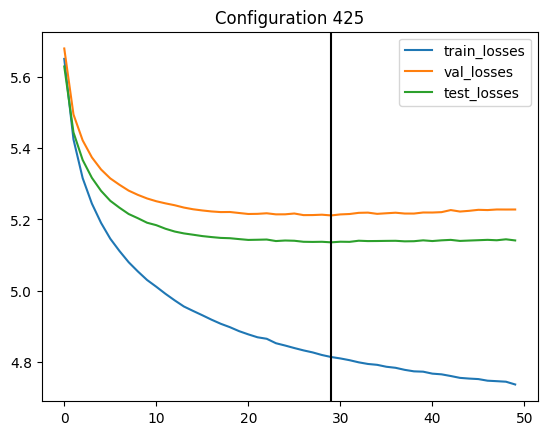

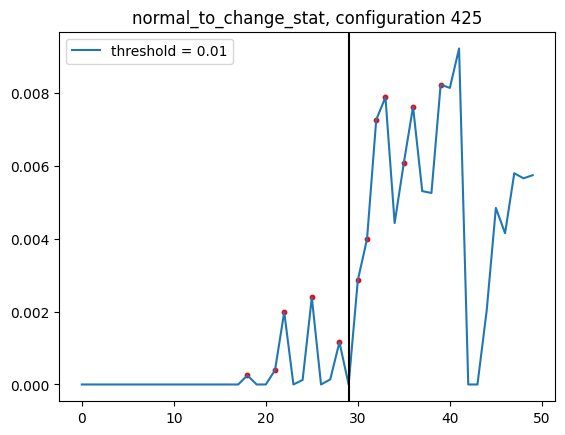

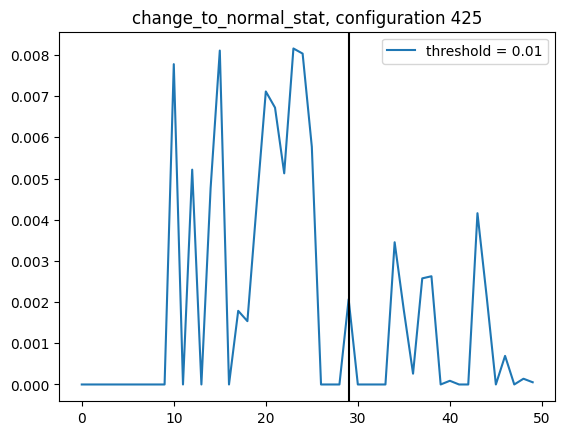

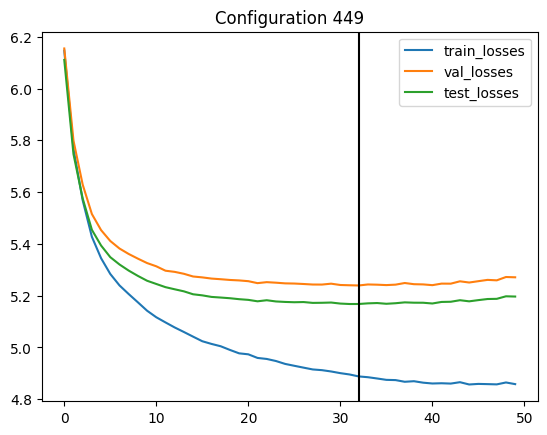

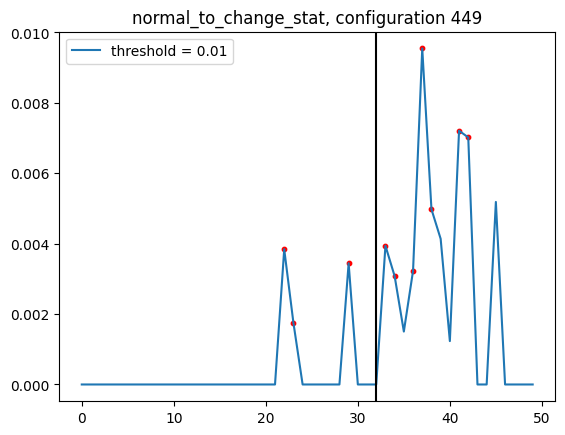

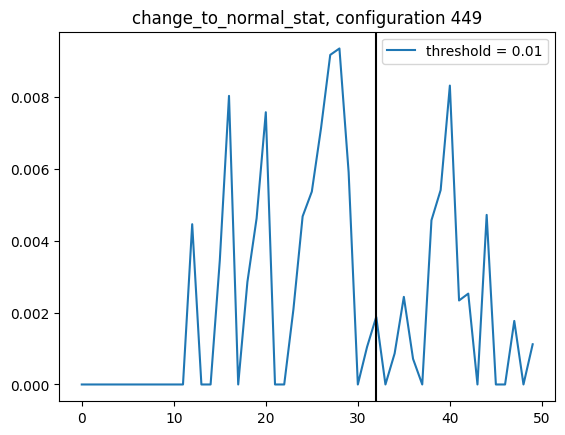

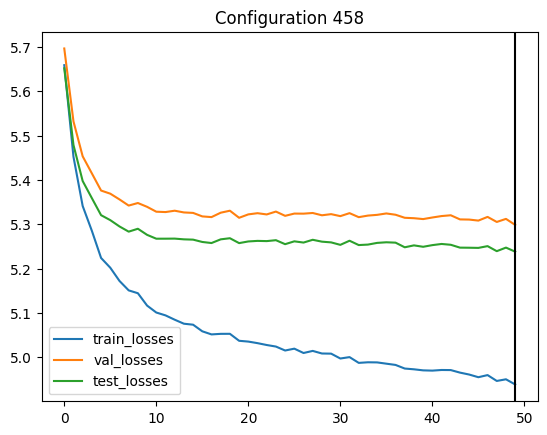

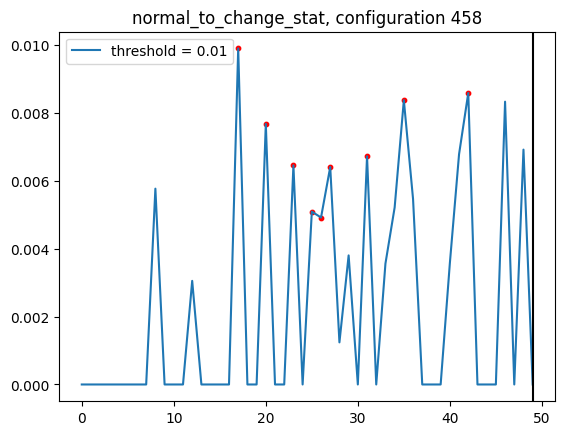

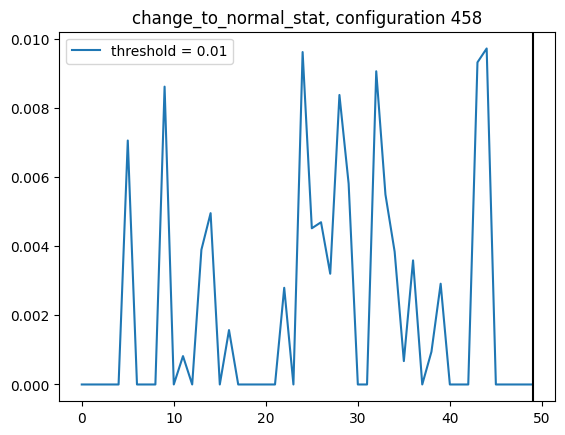

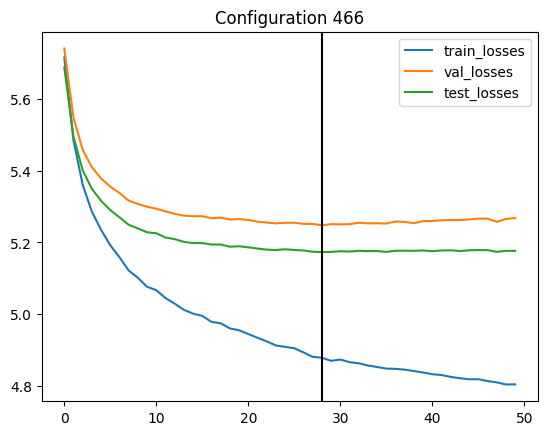

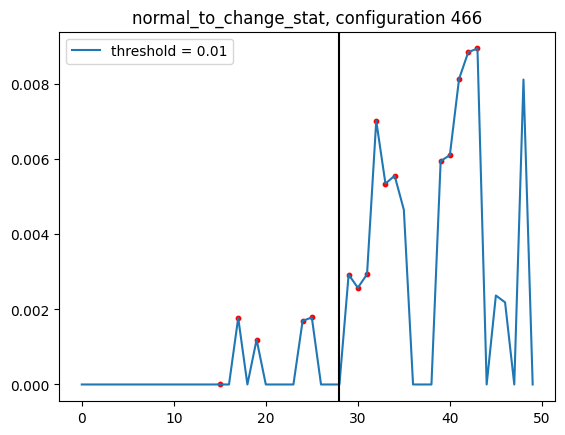

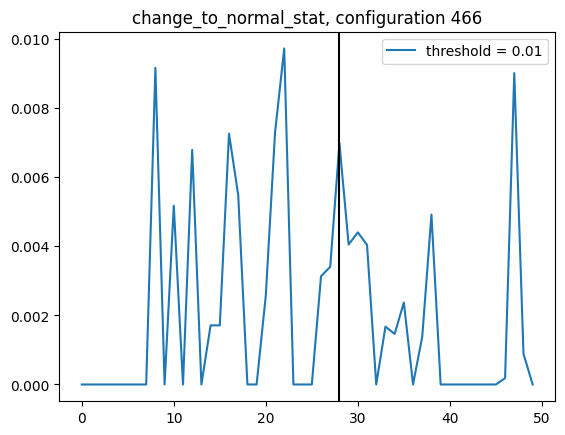

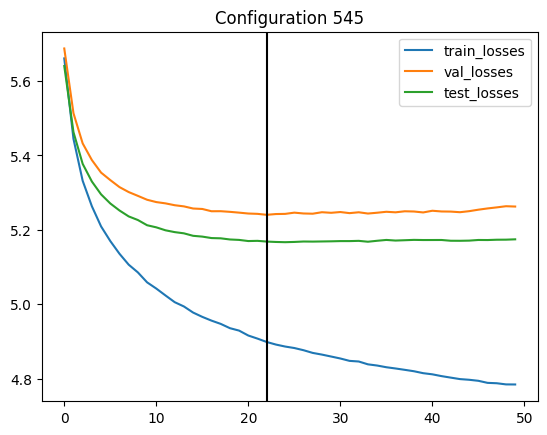

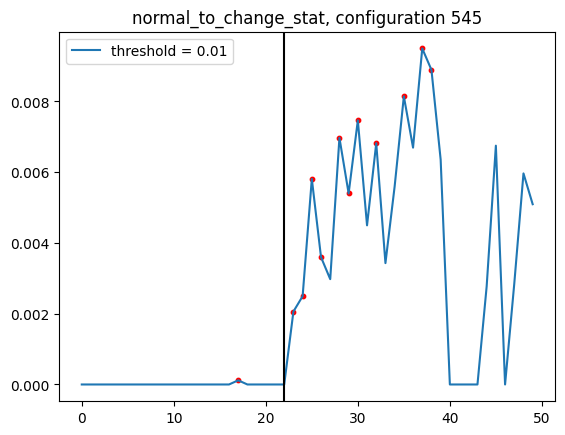

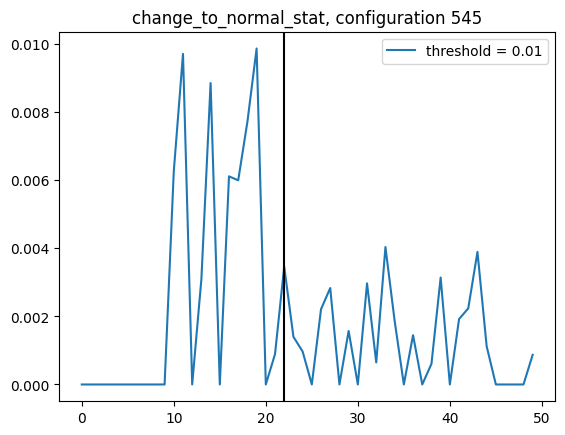

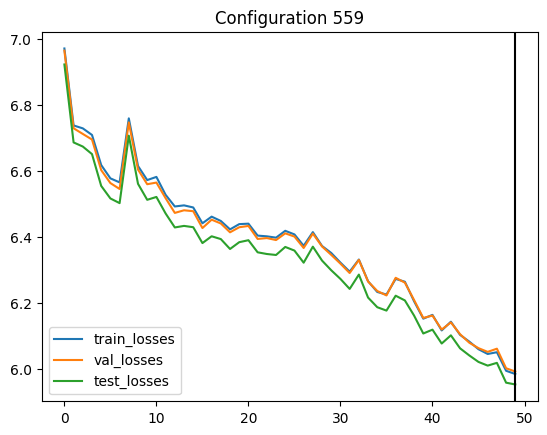

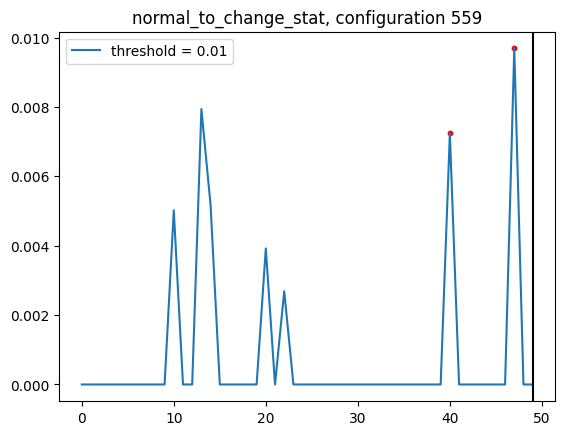

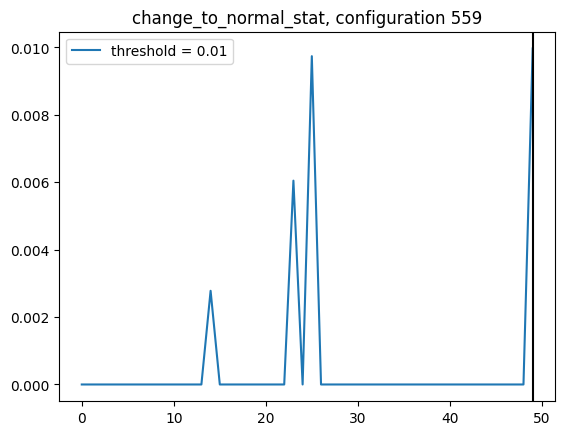

In [10]:
cusum_threshold = 0.9
lag = 5
threshold = 2
influence = 0.5
interesting_configurations_indexes = [0,1,2,4,5, 91, 110, 121, 131, 172, 193, 196, 257, 268, 342, 
                                      346, 382, 424, 425, 449, 458, 466, 545, 559]

for t in interesting_configurations_indexes:
    
    plt.plot(logs[str(t)]["train_losses"], label = "train_losses")
    plt.plot(logs[str(t)]["val_losses"],  label = "val_losses")
    plt.plot(logs[str(t)]["test_losses"], label = "test_losses")
    plt.legend()
    plt.title(f"Configuration {t}")
    plt.axvline(logs[str(t)]["early_stopping_epoch"], color = "black")
    plt.show()
    
    for cusum_threshold in [0.01]:#[0.01, 0.008, 0.005]:
        change_mask,all_change_idxs, normal_to_change_stat, change_to_normal_stat = cusum_detector(logs[str(t)]["val_losses"], 
                                                                                               cusum_threshold)
        result = thresholding_algo(normal_to_change_stat,  lag=15, threshold=threshold, influence=influence)
        
        plt.plot(normal_to_change_stat, label = f"threshold = {cusum_threshold}")
        plt.scatter(np.where(result["signals"] == 1)[0], normal_to_change_stat[np.where(result["signals"] == 1)[0]], color = "red", s = 10)

    plt.title(f"normal_to_change_stat, configuration {t}")
    plt.axvline(logs[str(t)]["early_stopping_epoch"], color = "black")
    plt.legend()
    plt.show()
    
    for cusum_threshold in [0.01]:#[0.01, 0.005, 0.001]:
        change_mask,all_change_idxs, normal_to_change_stat, change_to_normal_stat = cusum_detector(logs[str(t)]["val_losses"], 
                                                                                               cusum_threshold)
        
        plt.plot(change_to_normal_stat, label = f"threshold = {cusum_threshold}")
        
    plt.title(f"change_to_normal_stat, configuration {t}")
    plt.axvline(logs[str(t)]["early_stopping_epoch"], color = "black")
    plt.legend()
    plt.show()

In [11]:
d = 0
total = 0
for t in tqdm(range(len(search_set))):
    try:
        d += logs[str(t)]["test_losses"][logs[str(t)]["early_stopping_epoch"]] - logs[str(t)]["test_losses"][-1]
        total += 1
    except Exception as Ex:
        print(t, Ex)

 37%|████████████▋                     | 5344/14322 [00:00<00:00, 53439.92it/s]

3 list index out of range
11 list index out of range
21 list index out of range
22 list index out of range
26 list index out of range
35 list index out of range
57 list index out of range
59 list index out of range
61 list index out of range
62 list index out of range
66 list index out of range
80 list index out of range
84 list index out of range
106 list index out of range
107 list index out of range
112 list index out of range
117 list index out of range
118 list index out of range
137 list index out of range
159 list index out of range
161 list index out of range
178 list index out of range
179 list index out of range
182 list index out of range
185 list index out of range
202 list index out of range
204 list index out of range
232 list index out of range
233 list index out of range
235 list index out of range
244 list index out of range
250 list index out of range
251 list index out of range
262 list index out of range
271 list index out of range
277 list index out of range
280 li

100%|█████████████████████████████████| 14322/14322 [00:00<00:00, 46349.51it/s]

9845 list index out of range
9860 list index out of range
9863 list index out of range
9874 list index out of range
9879 list index out of range
9880 list index out of range
9892 list index out of range
9896 list index out of range
9898 list index out of range
9900 list index out of range
9905 list index out of range
9911 list index out of range
9912 list index out of range
9920 list index out of range
9924 list index out of range
9925 list index out of range
9937 list index out of range
9943 list index out of range
9945 list index out of range
9952 list index out of range
9954 list index out of range
9955 list index out of range
9958 list index out of range
9973 list index out of range
9974 list index out of range
9976 list index out of range
9981 list index out of range
9982 list index out of range
9996 list index out of range
9997 list index out of range
9998 list index out of range
10003 list index out of range
10008 list index out of range
10032 list index out of range
10041 list 

In [12]:
d / len(search_set), d / total

(-0.0015416813022017654, -0.001870865921888975)

In [13]:
cusum_thresholds=[]
total = []
for t in tqdm(range(len(search_set))):
    try:
        cusum_threshold = logs[str(t)]["cusum_threshold"]
        cusum_thresholds.append(cusum_threshold)
        total.append(t)
#         d += logs[str(t)]["test_losses"][logs[str(t)]["early_stopping_epoch"]] - logs[str(t)]["test_losses"][-1]
#         total += 1
    except Exception as Ex:
        print(t, Ex)
        cusum_threshold

100%|█████████████████████████████████| 14322/14322 [00:00<00:00, 96120.70it/s]


Идеи:

- по первому пику (возможно с каким-то трешхолдом 0.004) остановка -> сохранение времени (но потеря качества)
- по последнему/первому пику выбирать в succesive halving-е

# Saving of cusum results with ans without peaks detection 

In [61]:
lag = 10
threshold = 2
influence = 0.5

res = dict()

for t in tqdm(range(len(search_set))):
    res[t] = dict()
    for cusum_threshold in np.exp(np.linspace(-6, 3, 100)):
        try:
            change_mask, all_change_idxs, normal_to_change_stat, change_to_normal_stat = cusum_detector(logs[str(t)]["val_losses"], 
                                                                                                   cusum_threshold)
            result = thresholding_algo(normal_to_change_stat,  lag=lag, threshold=threshold, influence=influence)

            res[t][cusum_threshold] = {
                      "first change point": all_change_idxs[0],
                      "change points": all_change_idxs,           
                      "first_peak": np.where(result["signals"] == 1)[0][0],
                      "first_peak_with_threashold": np.where((result["signals"] * (normal_to_change_stat > 0.004)) == 1)[0][0],
                      "peaks": np.where(result["signals"] == 1)[0]}

        except Exception as ex:
            pass
                                           

100%|██████████████████████████████████| 14322/14322 [3:18:09<00:00,  1.20it/s]


In [86]:
res1 = {}
for key in tqdm(res.keys()):
    res1[str(key)] = {}
    for key1 in res[key].keys():
        res1[str(key)][str(key1)] = {}
        res1[str(key)][str(key1)]["peaks"] = list(np.array(res[key][key1]["peaks"]).astype("str"))
        res1[str(key)][str(key1)]["change_points"] = list(np.array(res[key][key1]["change points"]).astype("str"))
        res1[str(key)][str(key1)]["first_peak"] = str(int(res[key][key1]["first_peak"]))
        res1[str(key)][str(key1)]["first_peak_with_threashold"] = str(int(res[key][key1]["first_peak_with_threashold"]))
        res1[str(key)][str(key1)]["first_change_point"] = str(int(res[key][key1]["first change point"]))
        

100%|████████████████████████████████████| 14322/14322 [03:39<00:00, 65.29it/s]


In [87]:
with open("results_cusum_and_peaks.json", "w") as f:
    json.dump(res1, f)

# Testing of cusum results with ans without peaks detection

In [75]:
with open("results_cusum_and_peaks.json", "r") as f:
    res = json.load(f)

In [85]:
def test(res, thr, type_ = "first_change_point") :  
    all_test_losses = []
    all_wall_times = []
    N = iters_per_round
    saved_epoches = 0
    for i in tqdm_notebook(range(rounds)):
        seed = int(time.time() * 1e7 + i) // (2**32)
        env.reset()
        np.random.seed(seed)

        R = 50 
        eta = 3
        s_max = int(np.floor(np.log(R)/np.log(eta)))
        # B = (s_max + 1)*R
        B = N*R/3.5

        test_losses = []
        wall_times = []

        log_cnt = 0
        for s in range(s_max, -1, -1):
            n = int(np.ceil(float(B)/R * float(eta)**s/(s + 1)))
            r = R*float(eta)**(-s)
            T = np.random.choice(len(search_set), n, replace=False)
            for i in range(s + 1):
                n_i = int(np.floor(n*float(eta)**(-i)))
                r_i = int(np.floor(r*eta**i))
                L = []
                for t in T:
                    try:
                        early_stopping_epoch = int(res[str(t)][thr][type_])
                    except Exception as ex:
                         early_stopping_epoch = 51
                    ep = np.min([r_i, early_stopping_epoch])
                    saved_epoches += r_i - ep
                    env.simulated_train(search_set[t], ep)
                    if env.get_model_status(search_set[t]) == 'OK':
                        L.append(env.get_model_stats(search_set[t], ep - 1)['val_loss'])
                    else:
                        L.append(np.inf)
                    log_cnt += 1
                    if log_cnt % 25 == 0:
                        test_losses.append(env.get_test_loss_of_the_best_validated_architecture())
                        wall_times.append(env.get_total_time())
                test_losses.append(env.get_test_loss_of_the_best_validated_architecture())
                wall_times.append(env.get_total_time())

                L = np.array(L)
                halved_inds = np.argsort(L)[:int(np.floor(n_i/float(eta)))]
                halved_inds = halved_inds[L[halved_inds] < np.inf]
                T = T[halved_inds]
        all_test_losses.append(test_losses)
        all_wall_times.append(wall_times)
    return all_test_losses, all_wall_times

In [87]:
alg_resutls = {}
alg_resutls["first_change_point"] = {}

for cusum_threshold in tqdm(np.exp(np.linspace(-6, 3, 100))):
    all_test_losses, all_wall_times = test(res, str(cusum_threshold), "first_change_point")
    alg_resutls["first_change_point"][str(cusum_threshold)] = {'all_test_losses':all_test_losses, 'all_wall_times':all_wall_times}


  0%|                                                  | 0/100 [00:00<?, ?it/s]C:\Users\Иван\AppData\Local\Temp\ipykernel_12236\4119633452.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(rounds)):


  0%|          | 0/5 [00:00<?, ?it/s]


  1%|▍                                         | 1/100 [00:02<03:59,  2.42s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  2%|▊                                         | 2/100 [00:05<04:21,  2.66s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  3%|█▎                                        | 3/100 [00:07<04:11,  2.59s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  4%|█▋                                        | 4/100 [00:10<04:03,  2.54s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  5%|██                                        | 5/100 [00:12<03:52,  2.44s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  6%|██▌                                       | 6/100 [00:14<03:48,  2.43s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  7%|██▉                                       | 7/100 [00:17<03:42,  2.39s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  8%|███▎                                      | 8/100 [00:19<03:33,  2.32s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  9%|███▊                                      | 9/100 [00:21<03:34,  2.36s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 10%|████                                     | 10/100 [00:24<03:36,  2.41s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 11%|████▌                                    | 11/100 [00:26<03:21,  2.26s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 12%|████▉                                    | 12/100 [00:28<03:12,  2.19s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 13%|█████▎                                   | 13/100 [00:30<03:06,  2.15s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 14%|█████▋                                   | 14/100 [00:32<03:17,  2.29s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 15%|██████▏                                  | 15/100 [00:36<03:50,  2.71s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 16%|██████▌                                  | 16/100 [00:39<03:42,  2.64s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 17%|██████▉                                  | 17/100 [00:41<03:39,  2.64s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 18%|███████▍                                 | 18/100 [00:44<03:33,  2.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 19%|███████▊                                 | 19/100 [00:46<03:32,  2.62s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 20%|████████▏                                | 20/100 [00:49<03:26,  2.58s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 21%|████████▌                                | 21/100 [00:52<03:40,  2.79s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 22%|█████████                                | 22/100 [00:54<03:25,  2.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 23%|█████████▍                               | 23/100 [00:57<03:09,  2.47s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 24%|█████████▊                               | 24/100 [01:00<03:28,  2.75s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 25%|██████████▎                              | 25/100 [01:03<03:30,  2.81s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 26%|██████████▋                              | 26/100 [01:06<03:29,  2.84s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 27%|███████████                              | 27/100 [01:09<03:35,  2.95s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 28%|███████████▍                             | 28/100 [01:12<03:24,  2.84s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 29%|███████████▉                             | 29/100 [01:14<03:09,  2.66s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 30%|████████████▎                            | 30/100 [01:16<03:01,  2.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 31%|████████████▋                            | 31/100 [01:19<03:03,  2.66s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 32%|█████████████                            | 32/100 [01:22<02:57,  2.61s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 33%|█████████████▌                           | 33/100 [01:24<03:00,  2.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 34%|█████████████▉                           | 34/100 [01:27<02:55,  2.65s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 35%|██████████████▎                          | 35/100 [01:31<03:23,  3.13s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 36%|██████████████▊                          | 36/100 [01:34<03:05,  2.90s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 37%|███████████████▏                         | 37/100 [01:37<03:04,  2.93s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 38%|███████████████▌                         | 38/100 [01:39<02:53,  2.79s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 39%|███████████████▉                         | 39/100 [01:42<02:43,  2.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 40%|████████████████▍                        | 40/100 [01:44<02:35,  2.59s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 41%|████████████████▊                        | 41/100 [01:46<02:28,  2.51s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 42%|█████████████████▏                       | 42/100 [01:49<02:22,  2.46s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 43%|█████████████████▋                       | 43/100 [01:51<02:22,  2.50s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 44%|██████████████████                       | 44/100 [01:54<02:20,  2.50s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 45%|██████████████████▍                      | 45/100 [01:56<02:16,  2.48s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 46%|██████████████████▊                      | 46/100 [01:59<02:12,  2.46s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 47%|███████████████████▎                     | 47/100 [02:02<02:18,  2.61s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 48%|███████████████████▋                     | 48/100 [02:04<02:20,  2.71s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 49%|████████████████████                     | 49/100 [02:07<02:14,  2.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 50%|████████████████████▌                    | 50/100 [02:10<02:16,  2.72s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 51%|████████████████████▉                    | 51/100 [02:13<02:14,  2.75s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 52%|█████████████████████▎                   | 52/100 [02:15<02:09,  2.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 53%|█████████████████████▋                   | 53/100 [02:19<02:27,  3.14s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 54%|██████████████████████▏                  | 54/100 [02:25<02:53,  3.76s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 55%|██████████████████████▌                  | 55/100 [02:28<02:43,  3.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 56%|██████████████████████▉                  | 56/100 [02:30<02:21,  3.21s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 57%|███████████████████████▎                 | 57/100 [02:33<02:15,  3.15s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 58%|███████████████████████▊                 | 58/100 [02:38<02:36,  3.73s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 59%|████████████████████████▏                | 59/100 [02:42<02:27,  3.61s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 60%|████████████████████████▌                | 60/100 [02:45<02:24,  3.62s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 61%|█████████████████████████                | 61/100 [02:49<02:26,  3.75s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 62%|█████████████████████████▍               | 62/100 [02:54<02:32,  4.03s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 63%|█████████████████████████▊               | 63/100 [02:58<02:24,  3.90s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 64%|██████████████████████████▏              | 64/100 [03:01<02:12,  3.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 65%|██████████████████████████▋              | 65/100 [03:04<01:59,  3.41s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 66%|███████████████████████████              | 66/100 [03:07<01:54,  3.37s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 67%|███████████████████████████▍             | 67/100 [03:10<01:47,  3.25s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 68%|███████████████████████████▉             | 68/100 [03:13<01:41,  3.16s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 69%|████████████████████████████▎            | 69/100 [03:15<01:33,  3.02s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 70%|████████████████████████████▋            | 70/100 [03:18<01:29,  2.97s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 71%|█████████████████████████████            | 71/100 [03:21<01:23,  2.89s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 72%|█████████████████████████████▌           | 72/100 [03:24<01:18,  2.81s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 73%|█████████████████████████████▉           | 73/100 [03:26<01:13,  2.71s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 74%|██████████████████████████████▎          | 74/100 [03:28<01:07,  2.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 75%|██████████████████████████████▊          | 75/100 [03:31<01:03,  2.56s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 76%|███████████████████████████████▏         | 76/100 [03:34<01:02,  2.61s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 77%|███████████████████████████████▌         | 77/100 [03:36<00:59,  2.58s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 78%|███████████████████████████████▉         | 78/100 [03:39<00:55,  2.54s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 79%|████████████████████████████████▍        | 79/100 [03:41<00:52,  2.52s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 80%|████████████████████████████████▊        | 80/100 [03:44<00:52,  2.64s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 81%|█████████████████████████████████▏       | 81/100 [03:47<00:49,  2.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 82%|█████████████████████████████████▌       | 82/100 [03:49<00:47,  2.65s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 83%|██████████████████████████████████       | 83/100 [03:52<00:47,  2.78s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 84%|██████████████████████████████████▍      | 84/100 [03:56<00:48,  3.03s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 85%|██████████████████████████████████▊      | 85/100 [03:59<00:46,  3.10s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 86%|███████████████████████████████████▎     | 86/100 [04:03<00:44,  3.17s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 87%|███████████████████████████████████▋     | 87/100 [04:06<00:41,  3.16s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 88%|████████████████████████████████████     | 88/100 [04:09<00:39,  3.28s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 89%|████████████████████████████████████▍    | 89/100 [04:13<00:36,  3.30s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 90%|████████████████████████████████████▉    | 90/100 [04:16<00:32,  3.27s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 91%|█████████████████████████████████████▎   | 91/100 [04:19<00:29,  3.27s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 92%|█████████████████████████████████████▋   | 92/100 [04:22<00:25,  3.15s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 93%|██████████████████████████████████████▏  | 93/100 [04:25<00:22,  3.18s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 94%|██████████████████████████████████████▌  | 94/100 [04:29<00:20,  3.34s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 95%|██████████████████████████████████████▉  | 95/100 [04:32<00:16,  3.22s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 96%|███████████████████████████████████████▎ | 96/100 [04:35<00:12,  3.21s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 97%|███████████████████████████████████████▊ | 97/100 [04:38<00:09,  3.16s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 98%|████████████████████████████████████████▏| 98/100 [04:41<00:06,  3.17s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 99%|████████████████████████████████████████▌| 99/100 [04:44<00:03,  3.11s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|████████████████████████████████████████| 100/100 [04:48<00:00,  2.88s/it]


cusum threashold 0.0024787521766663585, 	mean time 213.26039664725462 h, 	mean loss 4.575214274878641
cusum threashold 0.0027146536329078004, 	mean time 213.26039664725462 h, 	mean loss 4.575214274878641
cusum threashold 0.002973005698605358, 	mean time 213.26039664725462 h, 	mean loss 4.575214274878641
cusum threashold 0.003255944985685815, 	mean time 213.26039664725462 h, 	mean loss 4.575214274878641
cusum threashold 0.0035658114462362553, 	mean time 213.26039664725462 h, 	mean loss 4.575214274878641
cusum threashold 0.0039051677242732293, 	mean time 213.26039664725462 h, 	mean loss 4.575214274878641
cusum threashold 0.004276820349208926, 	mean time 198.28790429287486 h, 	mean loss 4.575214274878641
cusum threashold 0.004683842946287709, 	mean time 158.0394380762842 h, 	mean loss 4.575214274878641
cusum threashold 0.005129601655946807, 	mean time 125.30674248642391 h, 	mean loss 4.647465085520328
cusum threashold 0.005617782972323415, 	mean time 114.65019413398372 h, 	mean loss 4.647

cusum threashold 4.690103007584092, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 5.136457483770347, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 5.625291265440799, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 6.160647084304641, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 6.7469524165833965, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 7.38905609893065, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 8.092268429068358, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 8.862405082778215, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 9.705835210448603, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 10.629534110942782, 	mean time 236.93871531373924 h, 	mean loss 4.578191960899575
cusum threashold 11

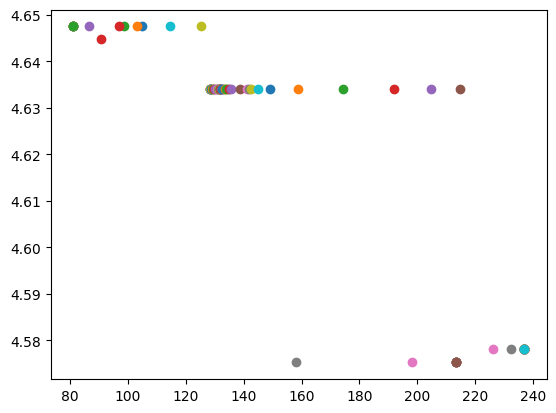

In [125]:
result = {}
results_for_pareto = []
min_loss = 1e5
for key in alg_resutls["first_change_point"]:
    tmp_time = []
    tmp_loss = []
    for i in range(5):
        tmp_time.append(alg_resutls["first_change_point"][key]['all_wall_times'][i][-1])
        tmp_loss.append(alg_resutls["first_change_point"][key]['all_test_losses'][i][-1])
    print(f"cusum threashold {key}, \tmean time {np.mean(tmp_time) / 60 / 60} h, \tmean loss {np.mean(tmp_loss)}")
    plt.scatter(np.mean(tmp_time) / 60 / 60, np.mean(tmp_loss))
    results_for_pareto.append({"cusum_threashold": key, "loss": np.mean(tmp_loss), "time": np.mean(tmp_time)})
    

cusum_threashold      loss           time  pareto
7   0.004683842946287709  4.575214  568941.977075    True
15  0.009692880458015281  4.647465  291731.311743    True
23  0.020058727982721628  4.644768  326163.400465    True
24  0.021967705889435498  4.633981  461737.150940    True
25   0.02405836015426445  4.633981  461737.150940    True

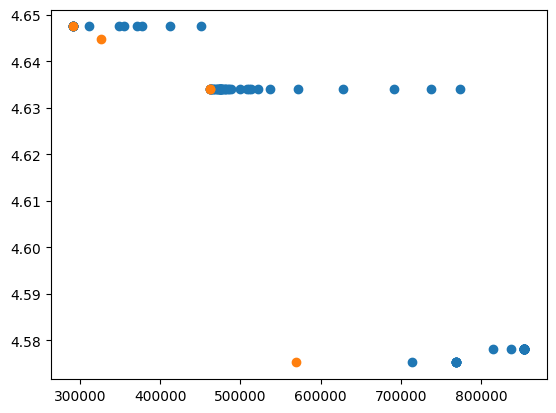

In [128]:
results_for_pareto = pd.DataFrame(results_for_pareto)
results_for_pareto["pareto"] = [False for i in range(len(results_for_pareto))]
for i in results_for_pareto.index:
    l = results_for_pareto.loc[i, "loss"]
    t = results_for_pareto.loc[i, "time"]
    if (results_for_pareto[results_for_pareto["loss"] <= l]["time"].values > t).all():
        results_for_pareto.loc[i, "pareto"] = True
    if (results_for_pareto[results_for_pareto["time"] < t]["loss"].values > l).all():
        results_for_pareto.loc[i, "pareto"] = True
pareto = results_for_pareto[results_for_pareto["pareto"]]
plt.scatter(results_for_pareto[results_for_pareto["pareto"] == False]["time"], 
            results_for_pareto[results_for_pareto["pareto"] == False]["loss"])

plt.scatter(results_for_pareto[results_for_pareto["pareto"]]["time"], 
            results_for_pareto[results_for_pareto["pareto"]]["loss"])
pareto

In [131]:
for threashold in pareto["cusum_threashold"]:
    result[f"cusum_{threashold}"] =  {'all_wall_times': alg_resutls["first_change_point"][threashold]['all_wall_times'],
                                      'all_test_losses': alg_resutls["first_change_point"][threashold]['all_test_losses']}

  0%|                                                  | 0/100 [00:00<?, ?it/s]C:\Users\Иван\AppData\Local\Temp\ipykernel_12236\4119633452.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(rounds)):


  0%|          | 0/5 [00:00<?, ?it/s]


  1%|▍                                         | 1/100 [00:02<03:39,  2.21s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  2%|▊                                         | 2/100 [00:04<03:45,  2.30s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  3%|█▎                                        | 3/100 [00:07<03:57,  2.45s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  4%|█▋                                        | 4/100 [00:09<03:42,  2.32s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  5%|██                                        | 5/100 [00:11<03:47,  2.39s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  6%|██▌                                       | 6/100 [00:14<03:38,  2.33s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  7%|██▉                                       | 7/100 [00:17<04:05,  2.64s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  8%|███▎                                      | 8/100 [00:19<03:58,  2.59s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


  9%|███▊                                      | 9/100 [00:22<03:57,  2.61s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 10%|████                                     | 10/100 [00:25<03:59,  2.66s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 11%|████▌                                    | 11/100 [00:28<04:03,  2.73s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 12%|████▉                                    | 12/100 [00:30<03:52,  2.64s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 13%|█████▎                                   | 13/100 [00:33<03:54,  2.70s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 14%|█████▋                                   | 14/100 [00:35<03:46,  2.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 15%|██████▏                                  | 15/100 [00:38<03:41,  2.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 16%|██████▌                                  | 16/100 [00:40<03:29,  2.49s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 17%|██████▉                                  | 17/100 [00:42<03:20,  2.41s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 18%|███████▍                                 | 18/100 [00:45<03:22,  2.47s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 19%|███████▊                                 | 19/100 [00:47<03:20,  2.47s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 20%|████████▏                                | 20/100 [00:50<03:19,  2.49s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 21%|████████▌                                | 21/100 [00:52<03:11,  2.43s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 22%|█████████                                | 22/100 [00:55<03:07,  2.40s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 23%|█████████▍                               | 23/100 [00:57<03:00,  2.34s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 24%|█████████▊                               | 24/100 [01:00<03:07,  2.46s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 25%|██████████▎                              | 25/100 [01:02<02:58,  2.38s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 26%|██████████▋                              | 26/100 [01:04<02:59,  2.43s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 27%|███████████                              | 27/100 [01:06<02:50,  2.34s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 28%|███████████▍                             | 28/100 [01:09<02:43,  2.27s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 29%|███████████▉                             | 29/100 [01:12<03:04,  2.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 30%|████████████▎                            | 30/100 [01:15<03:13,  2.76s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 31%|████████████▋                            | 31/100 [01:18<03:23,  2.95s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 32%|█████████████                            | 32/100 [01:21<03:18,  2.92s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 33%|█████████████▌                           | 33/100 [01:25<03:27,  3.10s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 34%|█████████████▉                           | 34/100 [01:27<03:16,  2.97s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 35%|██████████████▎                          | 35/100 [01:31<03:16,  3.03s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 36%|██████████████▊                          | 36/100 [01:33<03:08,  2.95s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 37%|███████████████▏                         | 37/100 [01:36<02:59,  2.84s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 38%|███████████████▌                         | 38/100 [01:39<02:57,  2.87s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 39%|███████████████▉                         | 39/100 [01:42<02:56,  2.90s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 40%|████████████████▍                        | 40/100 [01:45<02:54,  2.90s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 41%|████████████████▊                        | 41/100 [01:47<02:46,  2.83s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 42%|█████████████████▏                       | 42/100 [01:50<02:39,  2.74s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 43%|█████████████████▋                       | 43/100 [01:53<02:34,  2.70s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 44%|██████████████████                       | 44/100 [01:56<02:35,  2.77s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 45%|██████████████████▍                      | 45/100 [01:58<02:26,  2.66s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 46%|██████████████████▊                      | 46/100 [02:01<02:25,  2.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 47%|███████████████████▎                     | 47/100 [02:03<02:16,  2.58s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 48%|███████████████████▋                     | 48/100 [02:05<02:09,  2.48s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 49%|████████████████████                     | 49/100 [02:07<02:02,  2.41s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 50%|████████████████████▌                    | 50/100 [02:10<02:08,  2.57s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 51%|████████████████████▉                    | 51/100 [02:13<02:06,  2.58s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 52%|█████████████████████▎                   | 52/100 [02:16<02:04,  2.59s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 53%|█████████████████████▋                   | 53/100 [02:18<01:58,  2.51s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 54%|██████████████████████▏                  | 54/100 [02:21<02:03,  2.68s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 55%|██████████████████████▌                  | 55/100 [02:24<01:58,  2.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 56%|██████████████████████▉                  | 56/100 [02:27<02:06,  2.88s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 57%|███████████████████████▎                 | 57/100 [02:30<02:02,  2.85s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 58%|███████████████████████▊                 | 58/100 [02:33<01:58,  2.81s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 59%|████████████████████████▏                | 59/100 [02:35<01:50,  2.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 60%|████████████████████████▌                | 60/100 [02:38<01:49,  2.74s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 61%|█████████████████████████                | 61/100 [02:40<01:41,  2.59s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 62%|█████████████████████████▍               | 62/100 [02:43<01:44,  2.75s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 63%|█████████████████████████▊               | 63/100 [02:47<01:48,  2.94s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 64%|██████████████████████████▏              | 64/100 [02:50<01:47,  2.99s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 65%|██████████████████████████▋              | 65/100 [02:53<01:45,  3.01s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 66%|███████████████████████████              | 66/100 [02:56<01:45,  3.10s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 67%|███████████████████████████▍             | 67/100 [02:59<01:41,  3.06s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 68%|███████████████████████████▉             | 68/100 [03:03<01:42,  3.21s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 69%|████████████████████████████▎            | 69/100 [03:06<01:38,  3.18s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 70%|████████████████████████████▋            | 70/100 [03:08<01:32,  3.07s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 71%|█████████████████████████████            | 71/100 [03:13<01:37,  3.36s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 72%|█████████████████████████████▌           | 72/100 [03:15<01:29,  3.20s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 73%|█████████████████████████████▉           | 73/100 [03:19<01:32,  3.41s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 74%|██████████████████████████████▎          | 74/100 [03:24<01:42,  3.96s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 75%|██████████████████████████████▊          | 75/100 [03:28<01:37,  3.89s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 76%|███████████████████████████████▏         | 76/100 [03:31<01:28,  3.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 77%|███████████████████████████████▌         | 77/100 [03:34<01:18,  3.39s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 78%|███████████████████████████████▉         | 78/100 [03:36<01:05,  2.99s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 79%|████████████████████████████████▍        | 79/100 [03:38<00:57,  2.72s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 80%|████████████████████████████████▊        | 80/100 [03:40<00:50,  2.53s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 81%|█████████████████████████████████▏       | 81/100 [03:43<00:48,  2.54s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 82%|█████████████████████████████████▌       | 82/100 [03:46<00:49,  2.76s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 83%|██████████████████████████████████       | 83/100 [03:49<00:49,  2.92s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 84%|██████████████████████████████████▍      | 84/100 [03:52<00:46,  2.88s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 85%|██████████████████████████████████▊      | 85/100 [03:55<00:43,  2.87s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 86%|███████████████████████████████████▎     | 86/100 [03:58<00:39,  2.84s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 87%|███████████████████████████████████▋     | 87/100 [04:02<00:40,  3.09s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 88%|████████████████████████████████████     | 88/100 [04:05<00:36,  3.08s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 89%|████████████████████████████████████▍    | 89/100 [04:07<00:31,  2.84s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 90%|████████████████████████████████████▉    | 90/100 [04:09<00:27,  2.75s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 91%|█████████████████████████████████████▎   | 91/100 [04:12<00:23,  2.61s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 92%|█████████████████████████████████████▋   | 92/100 [04:14<00:20,  2.52s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 93%|██████████████████████████████████████▏  | 93/100 [04:16<00:17,  2.47s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 94%|██████████████████████████████████████▌  | 94/100 [04:19<00:14,  2.42s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 95%|██████████████████████████████████████▉  | 95/100 [04:21<00:11,  2.32s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 96%|███████████████████████████████████████▎ | 96/100 [04:23<00:09,  2.28s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 97%|███████████████████████████████████████▊ | 97/100 [04:25<00:06,  2.22s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 98%|████████████████████████████████████████▏| 98/100 [04:27<00:04,  2.19s/it]

  0%|          | 0/5 [00:00<?, ?it/s]


 99%|████████████████████████████████████████▌| 99/100 [04:30<00:02,  2.24s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|████████████████████████████████████████| 100/100 [04:32<00:00,  2.72s/it]


cusum threashold 0.0024787521766663585, 	mean time 230.5754072503249 h, 	mean loss 4.573922166546572
cusum threashold 0.0027146536329078004, 	mean time 230.5754072503249 h, 	mean loss 4.573922166546572
cusum threashold 0.002973005698605358, 	mean time 230.5754072503249 h, 	mean loss 4.573922166546572
cusum threashold 0.003255944985685815, 	mean time 230.5754072503249 h, 	mean loss 4.573922166546572
cusum threashold 0.0035658114462362553, 	mean time 230.5754072503249 h, 	mean loss 4.573922166546572
cusum threashold 0.0039051677242732293, 	mean time 230.5754072503249 h, 	mean loss 4.573922166546572
cusum threashold 0.004276820349208926, 	mean time 214.7882581745916 h, 	mean loss 4.573922166546572
cusum threashold 0.004683842946287709, 	mean time 195.23432722118164 h, 	mean loss 4.573922166546572
cusum threashold 0.005129601655946807, 	mean time 192.95487892720433 h, 	mean loss 4.573922166546572
cusum threashold 0.005617782972323415, 	mean time 190.24034268736838 h, 	mean loss 4.573922166

cusum threashold 8.092268429068358, 	mean time 148.00273381723298 h, 	mean loss 4.619990672880006
cusum threashold 8.862405082778215, 	mean time 148.00273381723298 h, 	mean loss 4.619990672880006
cusum threashold 9.705835210448603, 	mean time 148.00273381723298 h, 	mean loss 4.619990672880006
cusum threashold 10.629534110942782, 	mean time 148.00273381723298 h, 	mean loss 4.619990672880006
cusum threashold 11.641140918409853, 	mean time 148.60761701563993 h, 	mean loss 4.619990672880006
cusum threashold 12.74902177911694, 	mean time 148.60761701563993 h, 	mean loss 4.619990672880006
cusum threashold 13.962339040785407, 	mean time 148.03842922084863 h, 	mean loss 4.619990672880006
cusum threashold 15.291127026637097, 	mean time 148.03842922084863 h, 	mean loss 4.619990672880006
cusum threashold 16.746375020814504, 	mean time 148.03842922084863 h, 	mean loss 4.619990672880006
cusum threashold 18.340118151476506, 	mean time 148.03842922084863 h, 	mean loss 4.619990672880006
cusum threasho

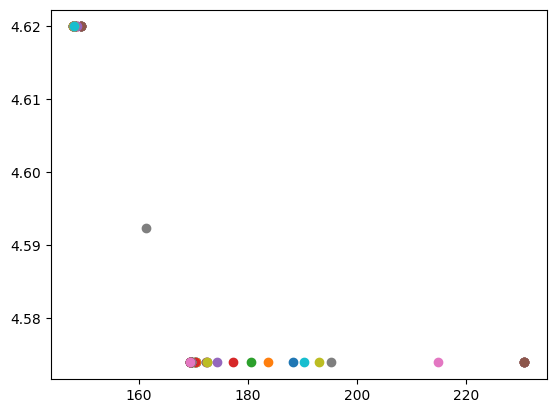

In [133]:
results_for_pareto = []
alg_resutls["first_peak"] = {}
for cusum_threshold in tqdm(np.exp(np.linspace(-6, 3, 100))):
    all_test_losses, all_wall_times = test(res, str(cusum_threshold), "first_peak")
    alg_resutls["first_peak"][str(cusum_threshold)] = {'all_test_losses':all_test_losses, 'all_wall_times':all_wall_times}
    
for key in alg_resutls["first_peak"]:
    tmp_time = []
    tmp_loss = []
    for i in range(5):
        tmp_time.append(alg_resutls["first_peak"][key]['all_wall_times'][i][-1])
        tmp_loss.append(alg_resutls["first_peak"][key]['all_test_losses'][i][-1])
    print(f"cusum threashold {key}, \tmean time {np.mean(tmp_time) / 60 / 60} h, \tmean loss {np.mean(tmp_loss)}")
    plt.scatter(np.mean(tmp_time) / 60 / 60, np.mean(tmp_loss))
    results_for_pareto.append({"cusum threashold": key, "loss": np.mean(tmp_loss), "time": np.mean(tmp_time)})
    

cusum threashold      loss           time  pareto
45  0.14821506633752016  4.573922  609365.580277    True
46  0.16232061118184815  4.573922  609365.580277    True
47   0.1777685728281378  4.573922  609365.580277    True
48   0.1946867083315101  4.573922  609365.580277    True
49  0.21321493331446223  4.573922  609365.580277    True
50   0.2335064790909135  4.573922  609365.580277    True
51   0.2557291599131007  4.573922  609365.580277    True
52  0.28006676082164894  4.573922  609365.580277    True
53   0.3067205575765568  4.573922  609365.580277    True
54   0.3359109812391624  4.573922  609365.580277    True
55  0.36787944117144233  4.573922  609365.580277    True
56  0.40289032152913296  4.573922  609365.580277    True
57   0.4412331677599839  4.592350  580637.671559    True
77    2.718281828459045  4.619991  532554.618286    True
78   2.9769791874949707  4.619991  532554.618286    True
79      3.2602966292874  4.619991  532554.618286    True
80   3.5705772333219405  4.619991  532554.618286    True
81    3.910387068646418  4.619991  532554.618286    True
82    4.282536415662627  4.619991  532554.618286    True
83    4.690103007584092  4.619991  532554.618286    True
84    5.136457483770347  4.619991  532554.618286    True
85    5.625291265440799  4.619991  532554.618286    True
86    6.160647084304641  4.619991  532554.618286    True
87   6.7469524165833965  4.619991  532554.618286    True
88     7.38905609893065  4.619991  532554.618286    True

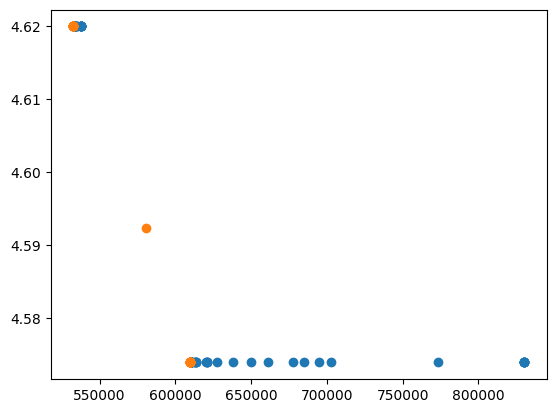

In [137]:
results_for_pareto = pd.DataFrame(results_for_pareto)
results_for_pareto["pareto"] = [False for i in range(len(results_for_pareto))]
for i in results_for_pareto.index:
    l = results_for_pareto.loc[i, "loss"]
    t = results_for_pareto.loc[i, "time"]
    if (results_for_pareto[results_for_pareto["loss"] <= l]["time"].values > t).all():
        results_for_pareto.loc[i, "pareto"] = True
    if (results_for_pareto[results_for_pareto["time"] < t]["loss"].values > l).all():
        results_for_pareto.loc[i, "pareto"] = True
pareto = results_for_pareto[results_for_pareto["pareto"]]
plt.scatter(results_for_pareto[results_for_pareto["pareto"] == False]["time"], 
            results_for_pareto[results_for_pareto["pareto"] == False]["loss"])

plt.scatter(results_for_pareto[results_for_pareto["pareto"]]["time"], 
            results_for_pareto[results_for_pareto["pareto"]]["loss"])
pareto

In [181]:
for threashold in pareto["cusum threashold"]:
    result[f"peaks_{threashold}"] =  {'all_wall_times': alg_resutls["first_peak"][threashold]['all_wall_times'],
                                      'all_test_losses': alg_resutls["first_peak"][threashold]['all_test_losses']}

In [188]:
all_test_losses, all_wall_times = test(None, None, None)
result["hyperband"] = {"all_wall_times": all_wall_times, "all_test_losses": all_test_losses}

C:\Users\Иван\AppData\Local\Temp\ipykernel_12236\4119633452.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(rounds)):


  0%|          | 0/5 [00:00<?, ?it/s]

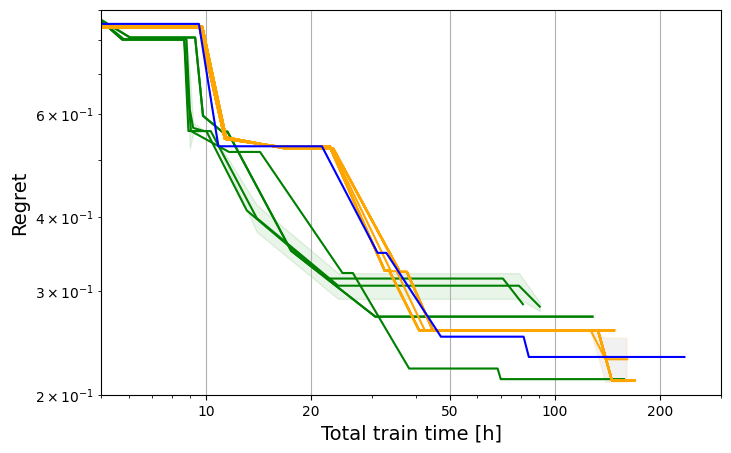

In [195]:
y_opt = env.get_best_possible_test_loss()

plt.figure(figsize=(8, 5), dpi=100)


for i, alg_name in enumerate(list(result.keys())):
    
    all_test_losses = result[alg_name]['all_test_losses']
    all_wall_times = result[alg_name]['all_wall_times']

    all_xs = np.array(all_test_losses)
    all_ts = np.array(all_wall_times)/3600.

    s = 1.96/np.sqrt(all_xs.shape[0])

    all_ts_mean = all_ts.mean(axis=0)

    all_ts_max = all_ts_mean + s*all_ts.std(axis=0)
    all_ts_min = all_ts_mean - s*all_ts.std(axis=0)

    all_xs_mean = np.nanmean(all_xs, axis=0)

    all_xs_max = all_xs_mean + s*np.nanstd(all_xs, axis=0)
    all_xs_min = all_xs_mean - s*np.nanstd(all_xs, axis=0)
    
    if alg_name[:5] == "cusum":
        c = "green"
    elif alg_name[:4] == "peak":
        c = "orange"
    else:
        c = "blue"
        
    plt.plot(all_ts_mean, all_xs_mean - y_opt, lw=1.5, color=c, label=alg_name) #color = f'C{i}'
    plt.fill_between(all_ts_mean, all_xs_min - y_opt, all_xs_max - y_opt, alpha=0.1, edgecolor=c)

#plt.legend()
plt.xlabel('Total train time [h]', fontsize=14)
plt.ylabel('Regret', fontsize=14)
plt.ylim([0.2, 0.9])
plt.xscale('log')
plt.yscale('log')
plt.xlim([5, 300])
plt.xticks([10, 20, 50, 100, 200]);
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.grid()
plt.savefig('cusum_experiments_pareto.png', dpi=300, bbox_inches='tight')

# Hyperband usage example

In [148]:
all_test_losses = []
all_wall_times = []
N = iters_per_round
for seed in tqdm_notebook(range(rounds)):
    env.reset()
    np.random.seed(seed)

    # HYPERBAND
    
    #inputs
    R = 50 # the maximum amount of resource that can be allocated to a single configuration (number of epochs)
    eta = 3 # an input that controls the proportion of configurations discarded in each round of SuccessiveHalving

    # initialization
    s_max = int(np.floor(np.log(R)/np.log(eta)))
    # B = (s_max + 1)*R
    B = N*R/3.5 # to approximately match budgets in random search

    test_losses = []
    wall_times = []
    
    log_cnt = 0
    for s in range(s_max, -1, -1):
        
        n = int(np.ceil(float(B)/R * float(eta)**s/(s + 1)))
        r = R*float(eta)**(-s)
        #print(s, n, r)
        # Successive Halving inner loop
        # init sample of n architectures
        T = np.random.choice(len(search_set), n, replace=False)
        #print(T)
        for i in range(s + 1):
            
            n_i = int(np.floor(n*float(eta)**(-i)))
            r_i = int(np.floor(r*eta**i))
            L = []
            for t in T:
                env.simulated_train(search_set[t], r_i)
                if env.get_model_status(search_set[t]) == 'OK':
                    L.append(env.get_model_stats(search_set[t], r_i - 1)['val_loss'])
                else:
                    L.append(np.inf) # if model fails accidently within r_i epochs, it is discated further
                log_cnt += 1
                if log_cnt % 25 == 0:
                    #print("log_cnt", log_cnt, "best test losses", env.get_test_loss_of_the_best_validated_architecture(), 
                     #    "total time", env.get_total_time())
                    test_losses.append(env.get_test_loss_of_the_best_validated_architecture())
                    wall_times.append(env.get_total_time())
            test_losses.append(env.get_test_loss_of_the_best_validated_architecture())
            wall_times.append(env.get_total_time())

            L = np.array(L)
            halved_inds = np.argsort(L)[:int(np.floor(n_i/float(eta)))]
            halved_inds = halved_inds[L[halved_inds] < np.inf] # discard accidently failed models
            T = T[halved_inds]
            #print(T)
    all_test_losses.append(test_losses)
    all_wall_times.append(wall_times)
alg_resutls['hyperband'] = {'all_test_losses':all_test_losses, 'all_wall_times':all_wall_times}

C:\Users\Иван\AppData\Local\Temp\ipykernel_12236\4181220904.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm_notebook(range(rounds)):


  0%|          | 0/5 [00:00<?, ?it/s]

In [149]:
all_test_losses = []
all_wall_times = []
N = iters_per_round
saved_epoches = 0
for seed in tqdm_notebook(range(rounds)):
    env.reset()
    np.random.seed(seed)

    R = 50 
    eta = 3
    s_max = int(np.floor(np.log(R)/np.log(eta)))
    # B = (s_max + 1)*R
    B = N*R/3.5

    test_losses = []
    wall_times = []
    
    log_cnt = 0
    for s in range(s_max, -1, -1):
        n = int(np.ceil(float(B)/R * float(eta)**s/(s + 1)))
        r = R*float(eta)**(-s)
        T = np.random.choice(len(search_set), n, replace=False)
        for i in range(s + 1):
            n_i = int(np.floor(n*float(eta)**(-i)))
            r_i = int(np.floor(r*eta**i))
            L = []
            for t in T:
                try:
                    early_stopping_epoch = res[t]["first_peak_with_threashold"]
                except Exception as ex:
                     early_stopping_epoch =51
                ep = np.min([r_i, early_stopping_epoch])
                saved_epoches += r_i - ep
                env.simulated_train(search_set[t], ep)
                if env.get_model_status(search_set[t]) == 'OK':
                    L.append(env.get_model_stats(search_set[t], ep - 1)['val_loss'])
                else:
                    L.append(np.inf)
                log_cnt += 1
                if log_cnt % 25 == 0:
                    test_losses.append(env.get_test_loss_of_the_best_validated_architecture())
                    wall_times.append(env.get_total_time())
            test_losses.append(env.get_test_loss_of_the_best_validated_architecture())
            wall_times.append(env.get_total_time())

            L = np.array(L)
            halved_inds = np.argsort(L)[:int(np.floor(n_i/float(eta)))]
            halved_inds = halved_inds[L[halved_inds] < np.inf]
            T = T[halved_inds]
    all_test_losses.append(test_losses)
    all_wall_times.append(wall_times)
alg_resutls['hyperband with early stopping soft'] = {'all_test_losses':all_test_losses, 'all_wall_times':all_wall_times}

C:\Users\Иван\AppData\Local\Temp\ipykernel_12236\1203734661.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm_notebook(range(rounds)):


  0%|          | 0/5 [00:00<?, ?it/s]